# **Análise de Churn**

Este projeto analisa o churn em um cenário simulado de uma empresa SaaS que oferece um ERP para pequenas e médias empresas, com foco em compreender o comportamento dos usuários e apoiar estratégias de retenção. A partir de uma análise exploratória de dados cadastrais e eventos de uso da plataforma, o estudo valida a hipótese de aumento da taxa de cancelamento, identifica padrões e perfis com maior risco de churn e mapeia eventos que antecedem o cancelamento. Os resultados são apresentados por meio de análises estatísticas e visualizações, gerando insights acionáveis para otimizar engajamento, retenção de clientes e a tomada de decisão estratégica no contexto de produtos digitais SaaS.

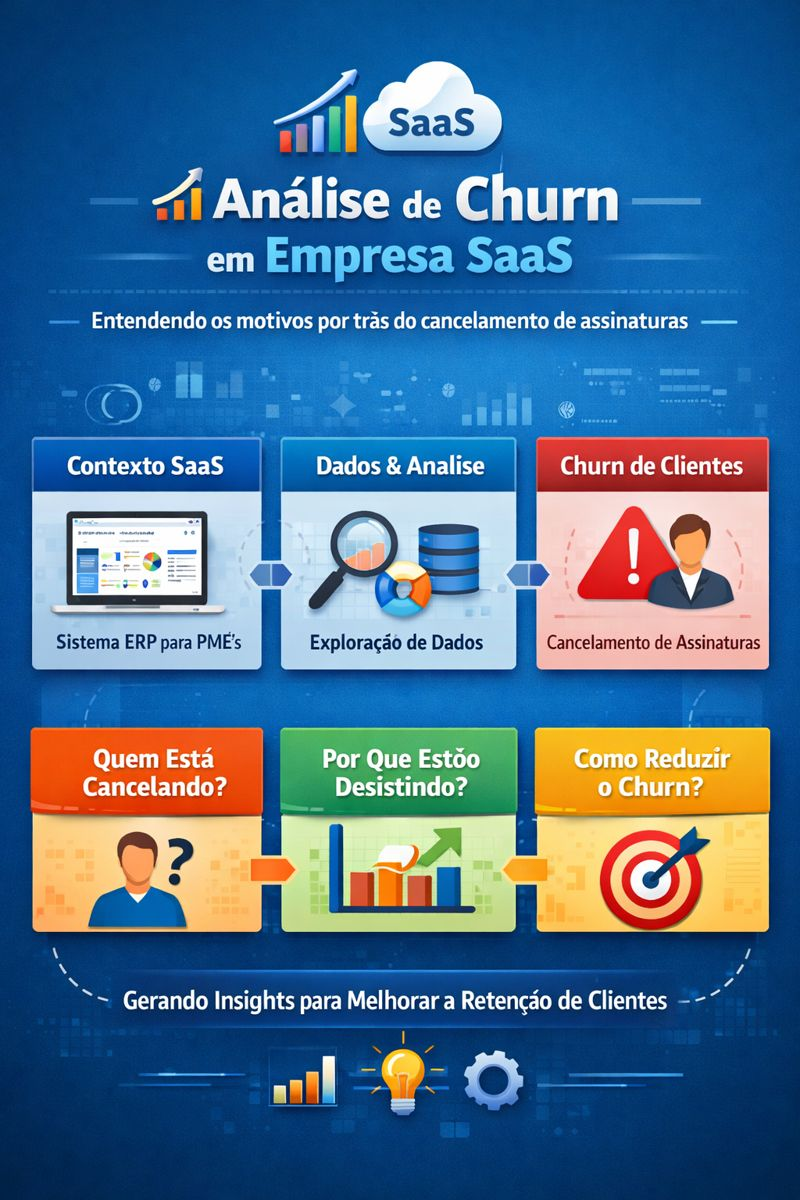

# **Missão**

1.Validar a hipótese levantada sobre o aumento do churn;

2.Realizar uma análise exploratória para identificar padrões, comportamentos ou informações relevantes que possam apoiar a equipe de negócios;

3.Elaborar um relatório com os principais insights obtidos.

# **Questões de gatilho para orientar a análise**

1.A taxa de churn aumentou nos últimos meses? Em quais períodos foi maior?

2.Existe relação entre engajamento com o produto e taxa de churn?

3.Há diferença de churn entre os planos (mensal, trimestral e anual)?

4.Qual perfil de cliente com menor probabilidade de churn?

5.Determinada empresa tem maior rotatividade?

#**Bibliotecas utilizadas**

In [6]:
#Biblioteca padrão

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("customer_churn_with_months.csv")

In [ ]:
#mostrando o arquivo
df

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4308,Micro empresa,2014,Não,até 5 funcionários,37,Sim,Sim,manual,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - pagamento único,96.55,3580.30,Sim,05/2025
7039,4950,Pequena empresa,2020,Não,até 5 funcionários,5,Não,NaN,automática,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - mês a mês,51.00,305.95,Sim,05/2025
7040,3303,Pequena empresa,2016,Não,até 5 funcionários,31,Sim,Sim,manual,Pouco uso,...,Uso frequente,Uso frequente,Trimestral,1,Yes,Boleto - pagamento único,103.45,3066.45,Sim,05/2025
7041,5548,Micro empresa,2016,Não,até 5 funcionários,3,Sim,Não,manual,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - pagamento único,89.45,240.45,Sim,05/2025


#**Renomeando colunas**

In [ ]:
df.columns

Index(['ID', 'Tipo de empresa', 'Fundação da empresa',
       'Possui mais de um sócio', 'Funcionários', 'Meses de permanência ',
       'Utiliza serviços financeiros', 'PossuiContador',
       'Faz conciliação bancária',
       'Frequência de utilização de feature do sistema: Módulo financeiro',
       'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
       'Frequência de utilização de feature do sistema: Integração bancária',
       'Frequência de utilização de feature do sistema: Módulo de vendas',
       'Frequência de utilização de feature do sistema: Relatórios',
       'Frequência de utilização de feature do sistema: Utilização de APIs de integração',
       'Contrato', 'Emite boletos', 'Emite boletos.1', 'Tipo de pagamento',
       'Receita mensal', 'Receita total', 'Churn', 'mes_churn'],
      dtype='object')

Observa-se que as colunas possuem nomenclatura extensa e estão fora do padrão (letras maiúsculas e minúsculas), sendo assim, é recomendável renomea-las

In [52]:
df = df.rename(columns={
    'ID': 'id',
    'Tipo de empresa': 'tipo_empresa',
    'Fundação da empresa': 'fundacao_empresa',
    'Possui mais de um sócio': 'mais_de_um_socio',
    'Funcionários': 'qtde_funcionarios',
    'Meses de permanência ': 'meses_permanencia',
    'Utiliza serviços financeiros': 'usa_servicos_financeiros',
    'contador': 'possui_contador',
    'Faz conciliação bancária': 'conciliacao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo financeiro': 'frequencia_usa_modulo_financeiro',
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal': 'frequencia_usa_emissao_nota_fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária': 'frequencia_usa_integracao_bancaria',
    'Frequência de utilização de feature do sistema: Módulo de vendas': 'frequencia_usa_modulo_vendas',
    'Frequência de utilização de feature do sistema: Relatórios': 'frequencia_usa_relatorios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração': 'frequencia_usa_apis',
    'Contrato': 'contrato',
    'Emite boletos': 'emite_boletos_binario',
    'Emite boletos.1': 'emite_boletos',
    'Tipo de pagamento': 'tipo_pagamento',
    'Receita mensal': 'receita_mensal',
    'Receita total': 'receita_total',
    'Churn': 'churn'
})

#**Análise de valores da base**

**Existem duplicados na base?**




In [41]:
df.duplicated().any()

np.False_

In [42]:
#Checando duplicados
df.duplicated().sum()

np.int64(0)

**Análise de valores únicos**

In [55]:
df.isnull().sum()

,0
id,0
tipo_empresa,0
fundacao_empresa,0
mais_de_um_socio,0
qtde_funcionarios,0
meses_permanencia,0
usa_servicos_financeiros,0
possui_contador,682
conciliacao_bancaria,0
frequencia_usa_modulo_financeiro,0


In [64]:
#avaliando tipos depagamento
df.tipo_pagamento.unique()

array(['Boleto - pagamento único', 'Boleto - mês a mês',
       'Cartão de crédito - pagamento único',
       'Cartão de crédito - mês a mês'], dtype=object)

In [65]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    print(f"Coluna: {col}")
    print(df[col].unique()[:5].tolist())
    print("\n")

Coluna: id
[1, 2, 4, 7, 8]


Coluna: fundacao_empresa
[2016, 2018, 2019, 2021, 2017]


Coluna: meses_permanencia
[1, 34, 45, 22, 10]


Coluna: emite_boletos_binario
[1, 0]


Coluna: receita_mensal
[29.85, 56.95, 42.3, 89.1, 29.75]


Coluna: receita_total
[29.85, 1889.5, 1840.75, 1949.4, 301.9]




**Análise de valores nulos**

In [56]:
#Visão geral dos tipos de valores
overview=pd.DataFrame({
    "Tipo":df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean()*100,
    "Valores Únicos":df.nunique(),
    "Exemplo de valores":df.apply(lambda x: x.unique()[:3])
})
overview



,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de valores
id,int64,0,0.000000,7043,"[1, 2, 4]"
tipo_empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
fundacao_empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
mais_de_um_socio,object,0,0.000000,2,"[Sim, Não]"
qtde_funcionarios,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
meses_permanencia,int64,0,0.000000,73,"[1, 34, 45]"
usa_servicos_financeiros,object,0,0.000000,2,"[Não, Sim]"
possui_contador,object,682,9.683374,2,"[nan, Não , Sim]"
conciliacao_bancaria,object,0,0.000000,3,"[automática, manual, não faz]"
frequencia_usa_modulo_financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


In [67]:
# Qual a % de valores nulos em "possui_contador"
print(f'{100*df['possui_contador'].isnull().mean():.2f}%')

9.68%


In [68]:
# Qual a % de valores nulos em "mes_churn"
print(f'{100*df['mes_churn'].isnull().mean():.2f}%')

73.46%


Observa-se que 73,46% dos clientes não cancelaram a assinatura

In [69]:
# Qual a % de valores nulos em "receita_total"
print(f'{100*df['receita_total'].isnull().mean():.2f}%')

0.16%


Identifica-se 11 valores zerados de "receita_total". É possível calcular esses valores multiplicando a "receita_mensal" pelo "meses_permanencia":


In [72]:
# Preenchendo valores nulos em 'receita_total' com a multiplicação de 'receita_mensal' por 'meses_permanencia'
df['receita_total'] = df.apply(lambda row: row['receita_mensal'] * row['meses_permanencia'] if pd.isna(row['receita_total']) else row['receita_total'], axis=1)

# Verificando se os valores nulos foram preenchidos na coluna 'receita_total'
print("Valores nulos após o preenchimento:")
print(df['receita_total'].isnull().sum())

Valores nulos após o preenchimento:
0


In [ ]:
#Existe padrões nos valores nulos da variável possui-contador?

In [78]:
df.groupby('tipo_empresa')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
tipo_empresa,
Micro empresa,9.489679
Pequena empresa,9.873418


Analisando os resultados, podemos ver que a porcentagem de valores nulos na coluna 'possui_contador' é muito similar entre Micro empresa (9.49%) e Pequena empresa (9.87%). Isso sugere que não existe um padrão significativo nos valores nulos da variável 'possui_contador' em relação ao tipo de empresa. A ausência dessa informação ocorre de forma proporcional em ambos os portes de empresa.

In [80]:
df.groupby('mais_de_um_socio')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
mais_de_um_socio,
Não,10.189508
Sim,9.141681


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'mais_de_um_socio', observamos que:

Para empresas que não possuem mais de um sócio, 10.19% dos valores em 'possui_contador' são nulos.
Para empresas que sim possuem mais de um sócio, 9.14% dos valores em 'possui_contador' são nulos.
Similar à análise anterior com 'tipo_empresa', as porcentagens são bem próximas. Isso indica que a presença ou ausência de mais de um sócio também não apresenta um padrão significativo para a ocorrência de valores nulos na coluna 'possui_contador'. A falta dessa informação parece ser distribuída de forma relativamente uniforme, independentemente dessa característica.

In [82]:
df.groupby('qtde_funcionarios')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
qtde_funcionarios,
6 ou mais funcionários,9.763033
até 5 funcionários,9.649301


Observa-se que, assim como nas análises anteriores, as porcentagens são próximas, indicando que não há presença de um padrão significativo

In [84]:
# Criando faixas para 'meses_permanencia'
bins = [0, 12, 36, 60, 72]
labels = ['0-12 meses', '13-36 meses', '37-60 meses', '61-72 meses']
df['meses_permanencia_binned'] = pd.cut(df['meses_permanencia'], bins=bins, labels=labels, right=False, include_lowest=True)

# Analisando a porcentagem de nulos em 'possui_contador' por 'meses_permanencia_binned'
df.groupby('meses_permanencia_binned')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

/tmp/ipython-input-3875910830.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('meses_permanencia_binned')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)


,possui_contador
meses_permanencia_binned,
0-12 meses,9.956501
13-36 meses,9.256370
37-60 meses,10.714286
61-72 meses,8.831401


Observa-se que, assim como nas análises anteriores, as porcentagens de valores nulos são bastante próximas entre os diferentes períodos de permanência. Isso indica que a duração da permanência do cliente não apresenta um padrão significativo para a ocorrência de valores nulos na coluna 'possui_contador'.

In [85]:
df.groupby('usa_servicos_financeiros')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
usa_servicos_financeiros,
Não,100.0
Sim,0.0


IObserva-se uma relação direta em que a informação sobre 'possui_contador' só está preenchida (não é nula) para as empresas que utilizam serviços financeiros. Para as empresas que não utilizam serviços financeiros, a informação sobre o contador está sempre ausente.

In [86]:
df.groupby('conciliacao_bancaria')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
conciliacao_bancaria,
automática,28.170178
manual,0.000000
não faz,0.000000


Os resultados da análise da coluna 'possui_contador' em relação à 'conciliacao_bancaria' revelam um padrão interessante e significativo:

Para as empresas que fazem conciliação bancária de forma 'manual' ou 'não faz', não há valores nulos na coluna 'possui_contador' (0%). Isso significa que, para esses grupos, a informação sobre o contador está sempre preenchida.
No entanto, para as empresas que fazem conciliação bancária de forma 'automática', há uma porcentagem considerável de valores nulos em 'possui_contador' (28.17%).

**Insights de valores nulos:**

1- O campo "possui_contador" tem um valor relevante de valores nulos, ou seja, não foi declarado como "sim" e nem como "não". Como não se sabe como foi realizado o preenchimento dessa informação, manteremos desta maneira;

2- Identifica-se 11 valores zerados de "receita_total". É possível calcular esses valores multiplicando a "receita_mensal" pelo "meses_permanencia", porém, como o número é irrelevante verificado o número de linhas, é possível manter durante a análise;

3- O "mes_churn" realmente possui alto valores de nulos, indicando os clientes que não realizaram a ação.


In [87]:
df.groupby('frequencia_usa_modulo_financeiro')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_modulo_financeiro,
Nunca utilizou,0.000000
Pouco uso,11.406518
Uso frequente,14.016840


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_modulo_financeiro', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' o módulo financeiro, 0% dos valores em 'possui_contador' são nulos. Isso é um padrão forte, semelhante ao que é apresentado em 'usa_servicos_financeiros'.
Para as empresas com 'Pouco uso' do módulo financeiro, 11.41% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' do módulo financeiro, 14.02% dos valores em 'possui_contador' são nulos.

In [88]:
df.groupby('frequencia_usa_emissao_nota_fiscal')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_emissao_nota_fiscal,
Nunca utilizou,0.000000
Pouco uso,12.791451
Uso frequente,11.815562


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_emissao_nota_fiscal', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' a emissão de nota fiscal, 0% dos valores em 'possui_contador' são nulos. Este é um padrão forte, semelhante ao que vimos com 'usa_servicos_financeiros' e 'frequencia_usa_modulo_financeiro'.
Para as empresas com 'Pouco uso' da emissão de nota fiscal, 12.79% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' da emissão de nota fiscal, 11.82% dos valores em 'possui_contador' são nulos.

In [89]:
df.groupby('frequencia_usa_integracao_bancaria')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_integracao_bancaria,
Nunca utilizou,0.000000
Pouco uso,12.180937
Uso frequente,12.592898


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_integracao_bancaria', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' a integração bancária, 0% dos valores em 'possui_contador' são nulos. Este é um padrão forte e consistente com as análises anteriores.
Para as empresas com 'Pouco uso' da integração bancária, 12.18% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' da integração bancária, 12.59% dos valores em 'possui_contador' são nulos.

In [90]:
df.groupby('frequencia_usa_modulo_vendas')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_modulo_vendas,
Nunca utilizou,0.000000
Pouco uso,11.315865
Uso frequente,14.138943


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_modulo_vendas', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' o módulo de vendas, 0% dos valores em 'possui_contador' são nulos. Este é um padrão forte, consistente com as análises anteriores.
Para as empresas com 'Pouco uso' do módulo de vendas, 11.32% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' do módulo de vendas, 14.14% dos valores em 'possui_contador' são nulos.

In [91]:
df.groupby('frequencia_usa_relatorios')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_relatorios,
Nunca utilizou,0.000000
Pouco uso,14.128114
Uso frequente,10.528260


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_relatorios', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' relatórios, 0% dos valores em 'possui_contador' são nulos. Este é um padrão forte, consistente com todas as análises anteriores.
Para as empresas com 'Pouco uso' de relatórios, 14.13% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' de relatórios, 10.53% dos valores em 'possui_contador' são nulos.

In [92]:
df.groupby('frequencia_usa_apis')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
frequencia_usa_apis,
Nunca utilizou,0.000000
Pouco uso,13.788151
Uso frequente,10.907760


Analisando os resultados da porcentagem de valores nulos na coluna 'possui_contador' em relação à variável 'frequencia_usa_apis', observamos o seguinte:

Para as empresas que 'Nunca utilizaram' APIs de integração, 0% dos valores em 'possui_contador' são nulos. Este é um padrão forte, consistente com todas as análises de frequência de uso de funcionalidades anteriores.
Para as empresas com 'Pouco uso' de APIs, 13.79% dos valores em 'possui_contador' são nulos.
Para as empresas com 'Uso frequente' de APIs, 10.91% dos valores em 'possui_contador' são nulos.

In [93]:
df.groupby('contrato')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
contrato,
Anual,9.498525
Mês-a-mês,9.703226
Trimestral,9.843856


Observa-se que, assim como nas análises iniciais (tipo de empresa, sócios, funcionários, meses de permanência), as porcentagens de valores nulos são bastante próximas entre os diferentes tipos de contrato. Isso indica que o tipo de contrato não apresenta um padrão significativo

In [94]:
df.groupby('emite_boletos_binario')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
emite_boletos_binario,
0,10.271588
1,9.278351


Assim como nas análises iniciais, as porcentagens de valores nulos são muito próximas entre as empresas que emitem e as que não emitem boletos. Isso indica que a emissão de boletos, de forma binária, não apresenta um padrão significativo

In [95]:
df.groupby('emite_boletos')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
emite_boletos,
No,10.271588
Yes,9.278351


Assim como nas análises iniciais, as porcentagens de valores nulos são muito próximas entre as empresas que emitem e as que não emitem boletos. Isso indica que a emissão de boletos, de forma categórica, não apresenta um padrão significativo

In [96]:
df.groupby('tipo_pagamento')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
tipo_pagamento,
Boleto - mês a mês,9.863524
Boleto - pagamento único,9.556025
Cartão de crédito - mês a mês,10.118265
Cartão de crédito - pagamento único,9.261658


Assim como nas análises iniciais (tipo de empresa, sócios, funcionários, meses de permanência, tipo de contrato, emissão de boletos), as porcentagens de valores nulos são muito próximas entre os diferentes tipos de pagamento. Isso indica que o tipo de pagamento não apresenta um padrão significativo



In [97]:
df.groupby('churn')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
churn,
Não,9.895632
Sim,9.095773


Assim como nas análises iniciais, as porcentagens de valores nulos são muito próximas entre as empresas que realizaram churn e as que não. Isso indica que a variável 'churn' não apresenta um padrão significativo

In [98]:
df.groupby('mes_churn')['possui_contador'].apply(lambda x: x.isnull().sum() / len(x) * 100)

,possui_contador
mes_churn,
04/2025,8.891328
05/2025,9.290188


Assim como nas análises iniciais, as porcentagens de valores nulos são muito próximas entre os meses de churn. Isso indica que a variável 'mes_churn' não apresenta um padrão significativo

#**A príncipio identifica-se os seguintes problemas:**

1- Temos duas colunas "Emite boletos", uma do tipo inteiro e outro do tipo texto(float);

2- Valores nulos em colunas importantes, como "possui_contador" (10%) e "mes_churn" (73%);

3- Não possui mesmo padrão de responsta em texto. Exemplo: "Yes","No" e "Sim", "Não";

4- Algumas colunas deveriam ser categóricas e não texto. Exemplo: Funcionários


#**Iniciando análise das variáveis**


## **Análise da variável "Tipo de empresa"**

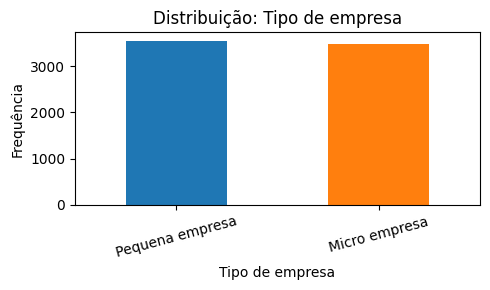

(tipo_empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 tipo_empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64,
 array(['Micro empresa', 'Pequena empresa'], dtype=object))

In [141]:
col="tipo_empresa"

#Checando valores unicos
valores_unicos = df[col].unique()

#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e'])
plt.title('Distribuição: Tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq,valores_unicos


**Insights da variável "Tipo de empresa"**

**Qualidade dos Dados:** A variável 'Tipo de empresa' apresenta excelente qualidade, sem valores nulos e com as categorias ('Micro empresa', 'Pequena empresa') corretamente registradas como texto.

**Distribuição Balanceada:** A distribuição entre as duas categorias é quase perfeita (50.2% Pequena empresa e 49.5% Micro empresa), indicando um conjunto de dados bem balanceado para este atributo.

**Relevância para Análise:**  Esta variável é fundamental para entender se o porte da empresa (micro ou pequena) influencia o comportamento de churn, sendo um bom indicador para futuras análises de segmentação.


## **Análise da variável "Data de fundação da empresa"**




Valores únicos [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
Ano mínimo: 2001
Ano máximo: 2021
Média: 2016.736475933551
Mediana: 2018.0
Desvio padrão: 4.582310729077341
Top 5 anos de fundação:
fundacao_empresa
2016    1029
2018     990
2019     982
2021     975
2017     969
Name: count, dtype: int64


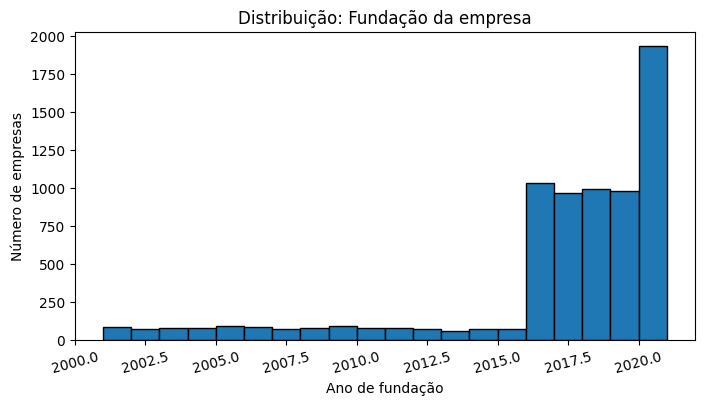

In [100]:
#analisando a data de fundação da empresa

col="fundacao_empresa"
anos = df[col]
print("Valores únicos", sorted(anos.unique()))
print("Ano mínimo:", anos.min())
print("Ano máximo:", anos.max())
print("Média:", anos.mean())
print("Mediana:", anos.median())
print("Desvio padrão:", anos.std())

# Frequência dos anos mais comuns (top 5)
top_anos = anos.value_counts().head(5)
print("Top 5 anos de fundação:")
print(top_anos)

#Gerando o gráfico
plt.figure(figsize=(8,4))
plt.hist(anos,bins=20, edgecolor='black')
plt.title('Distribuição: Fundação da empresa')
plt.xlabel('Ano de fundação')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.show()

**Insights da variável "Fundação da empresa"**

1. **Qualidade dos Dados:** A variável 'Fundação da empresa' apresenta excelente qualidade, sem valores nulos e com todas as datas de fundação registradas como números inteiros, variando de 2001 a 2021.

2. **Distribuição dos Valores:** A maioria das empresas na base de dados foi fundada mais recentemente, com uma concentração notável entre 2016 e 2021. Isso sugere que a base de clientes é composta predominantemente por empresas relativamente novas, o que pode impactar os padrões de churn.

3. **Relevância para Análise:** A idade da empresa pode ser um fator crucial no comportamento de churn. Empresas mais jovens podem ter necessidades diferentes ou maior volatilidade, enquanto empresas mais antigas podem demonstrar maior estabilidade ou, inversamente, tendências de modernização que as levem a buscar outras soluções.

## **Análise da variável "Possui mais de um sócio"**

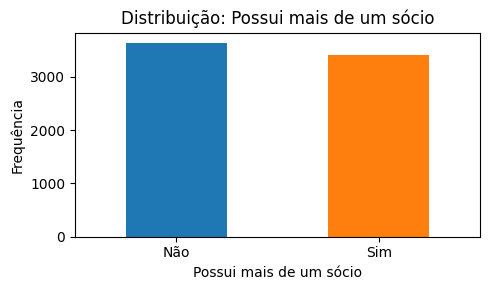

(mais_de_um_socio
 Não    3641
 Sim    3402
 Name: count, dtype: int64,
 mais_de_um_socio
 Não    51.69672
 Sim    48.30328
 Name: proportion, dtype: float64)

In [142]:
col="mais_de_um_socio"

#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e'])
plt.title('Distribuição: Possui mais de um sócio')
plt.xlabel('Possui mais de um sócio')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

abs_freq, rel_freq


**Insights da variável "Possui mais de um sócio"**

1. **Qualidade dos Dados:** A variável 'Possui mais de um sócio' apresenta excelente qualidade, sem valores nulos ou inconsistências, e as categorias estão claramente definidas como 'Sim' ou 'Não'.

2. **Distribuição dos Valores:** A distribuição é bem equilibrada, com 51.7% das empresas não possuindo mais de um sócio e 48.3% possuindo. Isso indica uma representação quase igual de ambos os grupos no dataset.

3. **Relevância para Análise:** Esta variável pode ser um fator importante para entender o perfil de clientes e a estrutura de governança da empresa, potencialmente influenciando decisões de negócio e, consequentemente, o churn. Uma análise mais aprofundada pode revelar se a presença de múltiplos sócios afeta a longevidade da relação com o serviço.

## **Análise da variável " Quantidade de Funcionários"**




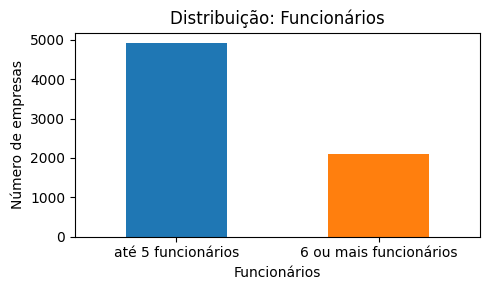

(qtde_funcionarios
 até 5 funcionários        4933
 6 ou mais funcionários    2110
 Name: count, dtype: int64,
 qtde_funcionarios
 até 5 funcionários        70.041176
 6 ou mais funcionários    29.958824
 Name: proportion, dtype: float64)

In [143]:
col="qtde_funcionarios"

#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e'])
plt.title('Distribuição: Funcionários')
plt.xlabel('Funcionários')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Quantidade deFuncionários"**

1. **Qualidade dos Dados:** A variável 'Quantidade de Funcionários' não possui valores nulos nem inconsistências, sendo categorizada em 'até 5 funcionários' e '6 ou mais funcionários'.

2. **Distribuição dos Valores:** A distribuição mostra que a maioria das empresas (70.04%) possui 'até 5 funcionários', enquanto 29.96% têm '6 ou mais funcionários'. Isso indica uma predominância de micro e pequenas empresas na amostra.

3. **Relevância para Análise:** O número de funcionários pode ser um indicador importante do porte real da empresa e da sua capacidade operacional, o que pode influenciar a complexidade das necessidades do cliente e, consequentemente, a propensão ao churn.

## **Análise da variável "Meses de permanência"**

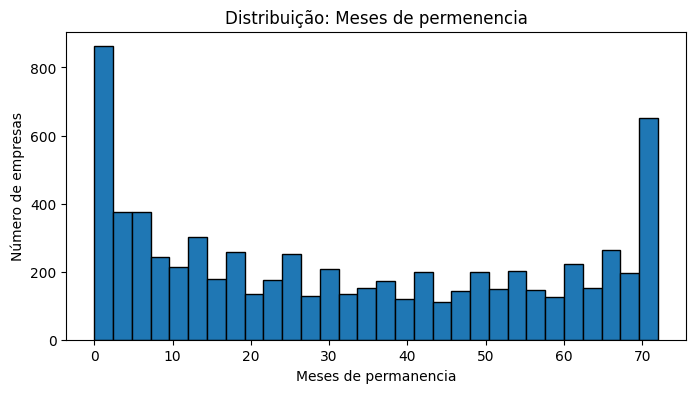

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: meses_permanencia, dtype: float64,
 73,
 72,
 0)

In [106]:
col = 'meses_permanencia'

# Estatísticas descritivas
desc = df[col].describe()

# Quantidade de valores únicos
valores_unicos = df[col].nunique()

# Checar possíveis outliers
valores_min = df[col].min()
valores_max = df[col].max()

#Gerando o gráfico
plt.figure(figsize=(8,4))
plt.hist(df[col],bins=30, edgecolor='black')
plt.title('Distribuição: Meses de permenencia')
plt.xlabel('Meses de permanencia')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.show()

desc,valores_unicos, valores_max, valores_min

**Insights da variável "Meses de permanência"**

 1. **Qualidade dos Dados:** A variável 'Meses de permanência' apresenta excelente qualidade, sem valores nulos nem inconsistências, com todas as entradas registradas como números inteiros, variando de 0 a 72 meses.

 A distribuição apresenta as seguintes estatísticas:

* Mínimo: 0 meses (provável cliente recém-cadastrado ou cancelado imediatamente)
* Máximo: 72 meses (6 anos de permanência)
* Média: 32,4 meses (aproximadamente 2 anos e 8 meses)
* Mediana: 29 meses (metade dos clientes ficou menos de 2 anos e 5 meses)
* Desvio padrão: 24,6 meses
* Valores únicos: 73 (indicando alta granularidade, sem agrupamentos prévios)

2. **Distribuição dos Valores:** O histograma revela que há uma concentração maior de clientes com menos tempo de permanência, indicando uma cauda longa à direita. Isso é comum em modelos de churn, onde muitos clientes entram e saem rapidamente, enquanto outros permanecem por períodos mais extensos.

3. **Relevância para Análise:** Esta variável é um indicador direto do tempo de vida do cliente e, portanto, crucial para entender o churn. Clientes com menor permanência podem ser mais propensos a churnar, o que pode justificar ações de retenção específicas para novos usuários.

## **Análise da variável "Utiliza serviços financeiros"**



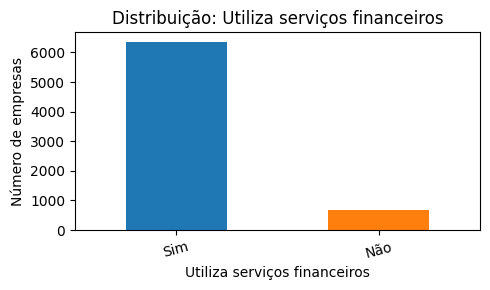

(usa_servicos_financeiros
 Sim    6361
 Não     682
 Name: count, dtype: int64,
 usa_servicos_financeiros
 Sim    90.316626
 Não     9.683374
 Name: proportion, dtype: float64)

In [144]:
col="usa_servicos_financeiros"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e'])
plt.title('Distribuição: Utiliza serviços financeiros')
plt.xlabel('Utiliza serviços financeiros')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Utiliza serviços financeiros"**

1. **Qualidade dos Dados:** A variável 'Utiliza serviços financeiros' é binária e apresenta excelente qualidade, sem valores nulos ou inconsistentes.

2. **Distribuição dos Valores:** Uma vasta maioria das empresas (90.32%) utiliza serviços financeiros, enquanto apenas 9.68% não. Essa alta adesão pode indicar que a contratação desse serviço é um padrão entre os clientes.

3. **Relevância para Análise:** É importante



 observar se o padrão de churn é mais elevado em perfis de clientes que não utilizam esse serviço, o que poderia sugerir uma necessidade não atendida ou um engajamento menor com o pacote de serviços completo.

## **Análise da variável "Possui contador"**

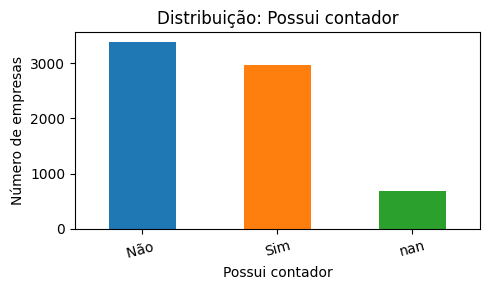

(possui_contador
 Não     3390
 Sim     2971
 NaN      682
 Name: count, dtype: int64,
 possui_contador
 Não     48.132898
 Sim     42.183729
 NaN      9.683374
 Name: proportion, dtype: float64)

In [145]:
col="possui_contador"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna= False)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Possui contador')
plt.xlabel('Possui contador')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Possui contador"**

1.  **Qualidade dos Dados:** A variável 'possui_contador' apresenta um total de 682 valores nulos, correspondendo a 9.68%. As categorias preenchidas são 'Não' e 'Sim'. A presença de valores nulos significativos exige atenção para alguma falha na integração, especialmente considerando os padrões não aleatórios descobertos.

2.  **Distribuição dos Valores:**
    *   **Não**: 3390 empresas (48.13%)
    *   **Sim**: 2971 empresas (42.18%)
    *   **Valores Nulos (NaN)**: 682 empresas (9.68%)

    A distribuição entre 'Não' e 'Sim' é relativamente equilibrada, mas a presença dos nulos, que representam quase 10% da base, é um fator importante.

3.  **Padrões de Valores Nulos (Insights Adicionais):** A análise detalhada revelou que a ausência de dados em 'possui_contador' não é aleatória:
    *   **Relacionamento Forte com 'Utiliza serviços financeiros'**: Para empresas que **não** utilizam serviços financeiros, 100% dos valores em 'possui_contador' são nulos. Isso sugere que a pergunta sobre o contador pode ser condicional a essa utilização.
    *   **Relacionamento com 'Conciliação bancária'**: Empresas que fazem conciliação 'manual' ou 'não fazem' têm 0% de nulos em 'possui_contador'. Já as que fazem 'automática' têm 28.17% de nulos.
    *   **Relacionamento com 'Frequência de utilização de funcionalidades'**: Para todas as funcionalidades analisadas (módulo financeiro, emissão de nota fiscal, integração bancária, módulo de vendas, relatórios, APIs), empresas que 'Nunca utilizaram' a funcionalidade têm 0% de nulos em 'possui_contador'. Aquelas com 'Pouco uso' ou 'Uso frequente' têm porcentagens de nulos mais elevadas (variando entre 10% e 14%).
    *   **Ausência de Padrões com outras variáveis**: Não foram identificados padrões significativos de valores nulos em 'possui_contador' em relação a 'tipo_empresa', 'mais_de_um_socio', 'qtde_funcionarios', 'meses_permanencia', 'contrato', 'emite_boletos' (binário e categórico), 'tipo_pagamento', 'churn' e 'mes_churn'.

4.  **Relevância para Análise:** A informação sobre possuir ou não um contador pode ser crucial, pois reflete o nível de maturidade e organização financeira da empresa, o que pode impactar a percepção de valor do serviço e, consequentemente, a propensão ao churn. O tratamento dos valores nulos deve ser cuidadoso, considerando os padrões identificados, para evitar introduzir viés nas análises ou modelos preditivos.

## **Análise da variável "Faz conciliação bancária"**

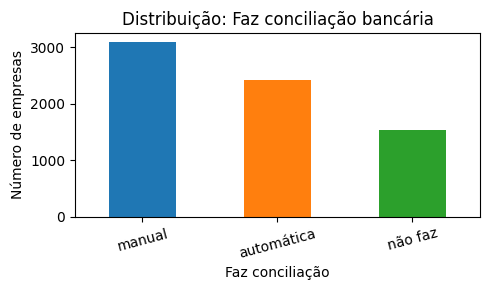

(conciliacao_bancaria
 manual        3096
 automática    2421
 não faz       1526
 Name: count, dtype: int64,
 conciliacao_bancaria
 manual        43.958540
 automática    34.374556
 não faz       21.666903
 Name: proportion, dtype: float64)

In [146]:
col="conciliacao_bancaria"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Faz conciliação bancária')
plt.xlabel('Faz conciliação')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Faz conciliação bancária"**

1.  **Qualidade dos Dados:** A variável 'conciliacao_bancaria' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'manual', 'automática' e 'não faz'.

2.  **Distribuição dos Valores:**
    *   **Manual**: 3096 empresas (43.96%)
    *   **Automática**: 2421 empresas (34.37%)
    *   **Não faz**: 1526 empresas (21.67%)

    A maior parte dos clientes faz a conciliação bancária de forma 'manual' (43.96%), seguida pela 'automática' (34.37%). Uma parcela significativa (21.67%) não realiza a conciliação.

3.  **Relevância para Análise:** Esta variável é um indicador importante da organização financeira e do nível de automação dos processos internos das empresas clientes. Pode influenciar diretamente a percepção de valor do sistema e, consequentemente, a propensão ao churn. Por exemplo, empresas que 'não fazem' conciliação podem ter necessidades diferentes daquelas que a fazem manualmente ou automaticamente.

## **Análise da variável "Frequencia de utilização do módulo financeiro"**

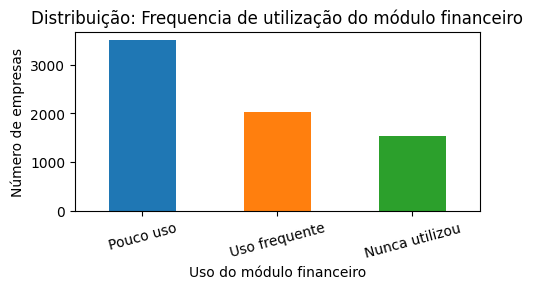

(frequencia_usa_modulo_financeiro
 Pouco uso         3498
 Uso frequente     2019
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_modulo_financeiro
 Pouco uso         49.666335
 Uso frequente     28.666761
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [147]:
col="frequencia_usa_modulo_financeiro"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização do módulo financeiro')
plt.xlabel('Uso do módulo financeiro')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia de utilização do módulo financeiro"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_modulo_financeiro' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 3498 empresas (49.67%)
    *   **Uso frequente**: 2019 empresas (28.67%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    Quase metade dos clientes (49.67%) faz 'Pouco uso' do módulo financeiro, e cerca de um quinto (21.67%) 'Nunca utilizou'. Isso indica que uma parcela significativa da base de clientes não está utilizando plenamente essa funcionalidade.

3.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento dos clientes com uma funcionalidade central do sistema. Empresas com 'Pouco uso' ou que 'Nunca utilizaram' o módulo financeiro podem estar em maior risco de churn, ou podem precisar de treinamento e suporte adicionais. Pode haver uma correlação entre o baixo uso e a propensão ao cancelamento, sugerindo que o valor percebido do produto não está sendo totalmente aproveitado.

## **Análise da variável "Frequencia de utilização emissão de notas fiscais"**

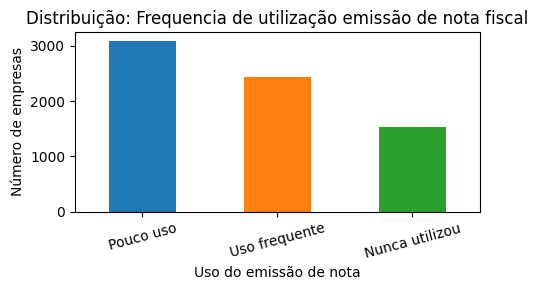

(frequencia_usa_emissao_nota_fiscal
 Pouco uso         3088
 Uso frequente     2429
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_emissao_nota_fiscal
 Pouco uso         43.844952
 Uso frequente     34.488144
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [148]:
col="frequencia_usa_emissao_nota_fiscal"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização emissão de nota fiscal')
plt.xlabel('Uso do emissão de nota')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia de utilização emissão de nota fiscal"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_emissao_nota_fiscal' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 3088 empresas (43.84%)
    *   **Uso frequente**: 2429 empresas (34.49%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    A maior parte dos clientes faz 'Pouco uso' (43.84%) ou 'Uso frequente' (34.49%) da emissão de notas fiscais. Cerca de um quinto dos clientes (21.67%) 'Nunca utilizou' essa funcionalidade.

3.  **Relevância para Análise:** Esta variável é importante para entender como os clientes utilizam uma funcionalidade fiscal essencial. Empresas que 'Nunca utilizaram' a emissão de notas fiscais podem ter necessidades diferentes ou estar em um segmento de negócio que não exige essa funcionalidade, ou podem estar subutilizando o sistema, o que pode influenciar a propensão ao churn. Um baixo uso pode indicar desengajamento ou que a funcionalidade não atende às suas expectativas.

## **Análise da variável "Frequencia de utilização de integração bancária"**

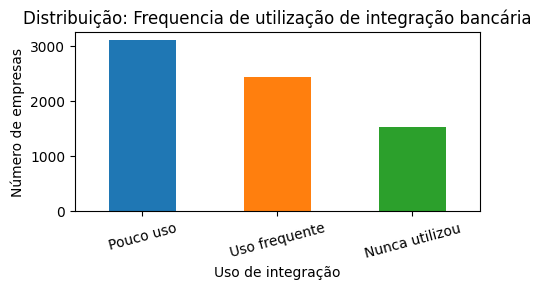

(frequencia_usa_integracao_bancaria
 Pouco uso         3095
 Uso frequente     2422
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_integracao_bancaria
 Pouco uso         43.944342
 Uso frequente     34.388755
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [149]:
col="frequencia_usa_integracao_bancaria"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização de integração bancária')
plt.xlabel('Uso de integração')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia de utilização de integração bancária"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_integracao_bancaria' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 3095 empresas (43.94%)
    *   **Uso frequente**: 2422 empresas (34.39%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    A maioria dos clientes faz 'Pouco uso' (43.94%) ou 'Uso frequente' (34.39%) da integração bancária. Cerca de um quinto dos clientes (21.67%) 'Nunca utilizou' essa funcionalidade.

3.  **Relevância para Análise:** Esta variável é importante para entender o nível de automação e a complexidade das operações financeiras dos clientes. Empresas que 'Nunca utilizaram' a integração bancária podem ter processos financeiros mais simples, ou podem estar perdendo benefícios de automação. O baixo engajamento com essa funcionalidade pode influenciar a percepção de valor do sistema e, consequentemente, a propensão ao churn. Por exemplo, uma alta taxa de churn em clientes que não utilizam a integração bancária poderia indicar que o sistema não está atendendo às suas necessidades básicas ou que a concorrência oferece soluções mais atrativas nesse aspecto.

## **Análise da variável "Frequencia de utilização de módulo de vendas"**

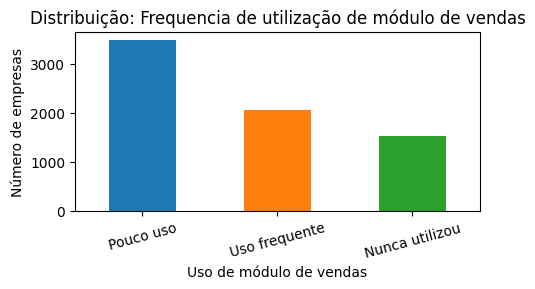

(frequencia_usa_modulo_vendas
 Pouco uso         3473
 Uso frequente     2044
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_modulo_vendas
 Pouco uso         49.311373
 Uso frequente     29.021724
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [150]:
col="frequencia_usa_modulo_vendas"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização de módulo de vendas')
plt.xlabel('Uso de módulo de vendas')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia de utilização de módulo de vendas"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_modulo_vendas' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 3473 empresas (49.31%)
    *   **Uso frequente**: 2044 empresas (29.02%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    Quase metade dos clientes (49.31%) faz 'Pouco uso' do módulo de vendas, e cerca de um quinto (21.67%) 'Nunca utilizou'. Isso indica que uma parcela significativa da base de clientes não está utilizando plenamente essa funcionalidade.

3.  **Relevância para Análise:** Esta variável é importante para entender o engajamento dos clientes com o módulo de vendas. Empresas com baixo uso ou que nunca utilizaram essa funcionalidade podem ter necessidades diferentes ou estar perdendo benefícios do sistema, o que pode influenciar a propensão ao churn. Um baixo uso pode indicar desengajamento ou que a funcionalidade não atende às suas expectativas.

## **Análise da variável "Frequencia de utilização de relatórios"**

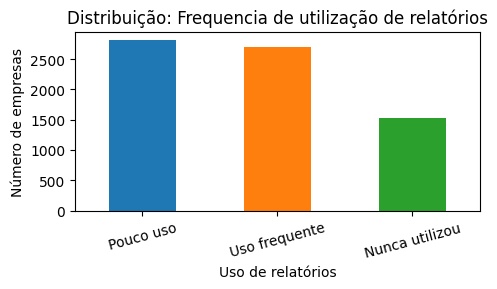

(frequencia_usa_relatorios
 Pouco uso         2810
 Uso frequente     2707
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_relatorios
 Pouco uso         39.897771
 Uso frequente     38.435326
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [151]:
col="frequencia_usa_relatorios"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização de relatórios')
plt.xlabel('Uso de relatórios')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia de utilização de relatórios"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_relatorios' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 2810 empresas (39.90%)
    *   **Uso frequente**: 2707 empresas (38.44%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    A distribuição é relativamente equilibrada entre 'Pouco uso' e 'Uso frequente', com cerca de 40% e 38% respectivamente. Aproximadamente um quinto dos clientes (21.67%) 'Nunca utilizou' a funcionalidade de relatórios.

3.  **Relevância para Análise:** Esta variável é importante para entender o quão analíticos e informados os clientes estão sendo com o sistema. Empresas que 'Nunca utilizaram' relatórios podem não estar aproveitando ao máximo o sistema para tomadas de decisão, o que pode impactar sua satisfação e, consequentemente, a propensão ao churn. Um baixo uso pode indicar que as funcionalidades de relatório não são intuitivas, não atendem às suas necessidades específicas, ou que os clientes não entendem o valor que podem extrair delas.

## **Análise da variável "Frequencia utilização de APIs"**

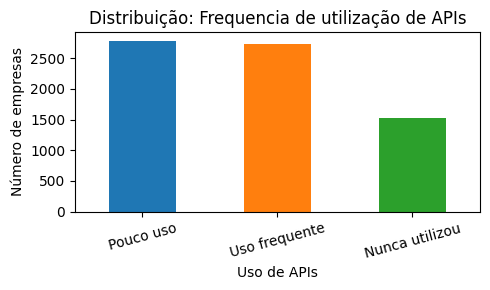

(frequencia_usa_apis
 Pouco uso         2785
 Uso frequente     2732
 Nunca utilizou    1526
 Name: count, dtype: int64,
 frequencia_usa_apis
 Pouco uso         39.542808
 Uso frequente     38.790288
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [152]:
col="frequencia_usa_apis"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Frequencia de utilização de APIs')
plt.xlabel('Uso de APIs')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Frequencia utilização de APIs"**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_apis' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição dos Valores:**
    *   **Pouco uso**: 2785 empresas (39.54%)
    *   **Uso frequente**: 2732 empresas (38.79%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    A distribuição é relativamente equilibrada entre 'Pouco uso' e 'Uso frequente', com cerca de 39.54% e 38.79% respectivamente. Aproximadamente um quinto dos clientes (21.67%) 'Nunca utilizou' a funcionalidade de APIs.

3.  **Relevância para Análise:** Esta variável é importante para entender o nível de integração e personalização que os clientes buscam ou necessitam do sistema. Empresas que 'Nunca utilizaram' APIs podem ter processos mais simples, ou não ter a capacidade técnica para integrações, ou podem estar perdendo oportunidades de otimização. O baixo engajamento com APIs pode indicar que a funcionalidade não é intuitiva, não atende às suas necessidades de integração, ou que os clientes não entendem o valor que podem extrair dela. Isso pode influenciar a percepção de valor do sistema e, consequentemente, a propensão ao churn.

## **Análise da variável "Tipo de Contrato"**

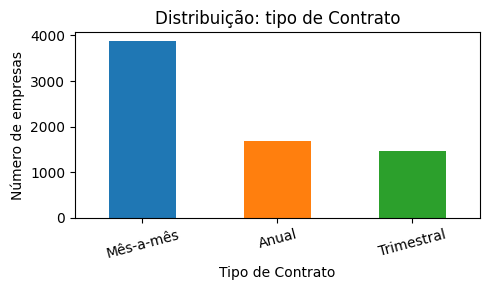

(contrato
 Mês-a-mês     3875
 Anual         1695
 Trimestral    1473
 Name: count, dtype: int64,
 contrato
 Mês-a-mês     387500
 Anual         169500
 Trimestral    147300
 Name: count, dtype: int64)

In [153]:
col="contrato"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts()*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Tipo de Contrato"**

1.  **Qualidade dos Dados:** A variável 'contrato' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Mês-a-mês', 'Anual' e 'Trimestral'.

2.  **Distribuição dos Valores:**
    *   **Mês-a-mês**: 3875 empresas (55.02%)
    *   **Anual**: 1695 empresas (24.07%)
    *   **Trimestral**: 1473 empresas (20.91%)

    A maioria dos clientes possui contrato 'Mês-a-mês' (55.02%), seguido por 'Anual' (24.07%) e 'Trimestral' (20.91%).

3.  **Relevância para Análise:** Esta variável é fundamental para entender a relação contratual dos clientes com o serviço. Diferentes tipos de contrato podem implicar diferentes níveis de comprometimento e, consequentemente, influenciar a propensão ao churn. Por exemplo, clientes com contratos 'Mês-a-mês' podem ter maior flexibilidade para cancelar o serviço em comparação com contratos 'Anual', o que pode gerar taxas de churn distintas. A análise da taxa de churn por tipo de contrato pode revelar se há planos que precisam de estratégias de retenção mais focadas.

## **Análise da variável "Emite boletos"**

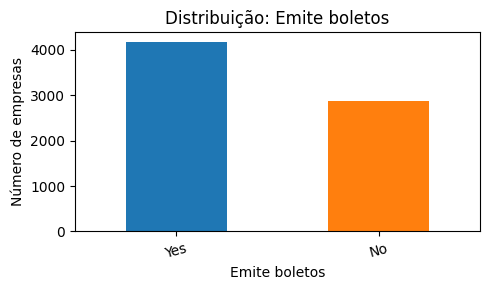

(emite_boletos
 Yes    4171
 No     2872
 Name: count, dtype: int64,
 emite_boletos
 Yes    59.221922
 No     40.778078
 Name: proportion, dtype: float64)

In [154]:
col="emite_boletos"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Emite boletos')
plt.xlabel('Emite boletos')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Emite boletos"**

1.  **Qualidade dos Dados:** A variável 'emite_boletos' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Yes' e 'No'.

2.  **Distribuição dos Valores:**
    *   **Yes**: 4171 empresas (59.22%)
    *   **No**: 2872 empresas (40.78%)

    A maioria dos clientes (59.22%) emite boletos, enquanto uma parcela significativa (40.78%) não emite.

3.  **Relevância para Análise:** Esta variável é importante para entender as necessidades operacionais e financeiras dos clientes. A emissão de boletos pode ser uma funcionalidade crucial para muitos negócios, e o perfil de clientes que emitem boletos pode diferir daquele que não emite, impactando a percepção de valor do serviço e, consequentemente, a propensão ao churn. Por exemplo, se clientes que não emitem boletos apresentarem uma alta taxa de churn, isso pode indicar que o sistema não está atendendo a outras necessidades essenciais para eles, ou que a funcionalidade de boletos é um fator decisivo para a retenção.

**Comparando as colunas "emite_boletos"x "emite_boleto_binário"**

In [129]:
# Mapeando 'emite_boletos' para um formato binário para comparação
df['emite_boletos_mapped'] = df['emite_boletos'].map({'Yes': 1, 'No': 0})

# Comparando as duas colunas
discrepancies = df[df['emite_boletos_binario'] != df['emite_boletos_mapped']]

if discrepancies.empty:
    print("As colunas 'emite_boletos_binario' e 'emite_boletos' são consistentes.")
else:
    print(f"Foram encontradas {len(discrepancies)} inconsistências entre as colunas 'emite_boletos_binario' e 'emite_boletos'.")
    print("Exemplos de inconsistências:")
    display(discrepancies[['emite_boletos_binario', 'emite_boletos_mapped', 'emite_boletos']].head())

As colunas 'emite_boletos_binario' e 'emite_boletos' são consistentes.


## **Análise da variável "Tipo de pagamento"**




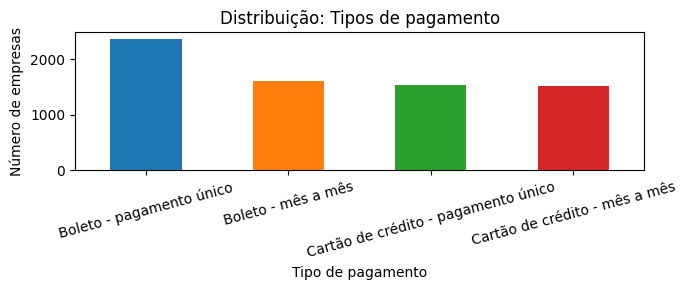

(tipo_pagamento
 Boleto - pagamento único               2365
 Boleto - mês a mês                     1612
 Cartão de crédito - pagamento único    1544
 Cartão de crédito - mês a mês          1522
 Name: count, dtype: int64,
 tipo_pagamento
 Boleto - pagamento único               33.579441
 Boleto - mês a mês                     22.887974
 Cartão de crédito - pagamento único    21.922476
 Cartão de crédito - mês a mês          21.610109
 Name: proportion, dtype: float64)

In [155]:
col="tipo_pagamento"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(7,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribuição: Tipos de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Tipo de pagamento"**

1.  **Qualidade dos Dados:** A variável 'tipo_pagamento' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas, combinando o método (Boleto, Cartão de crédito) e a frequência (pagamento único, mês a mês).

2.  **Distribuição dos Valores:**
    *   **Boleto - pagamento único**: 2365 empresas (33.58%)
    *   **Boleto - mês a mês**: 1612 empresas (22.89%)
    *   **Cartão de crédito - pagamento único**: 1544 empresas (21.92%)
    *   **Cartão de crédito - mês a mês**: 1522 empresas (21.61%)

    'Boleto - pagamento único' é a modalidade mais comum, representando um terço dos clientes. As outras três modalidades têm distribuições bastante equilibradas, cada uma com cerca de um quinto da base.

3.  **Relevância para Análise:** Esta variável é importante para entender as preferências de pagamento dos clientes e o nível de compromisso financeiro. Diferentes tipos de pagamento podem estar associados a diferentes perfis de clientes e, consequentemente, a distintas propensões ao churn. Por exemplo, clientes com pagamento único podem ter um perfil diferente daqueles com pagamentos mensais, o que pode influenciar a forma como percebem o valor do serviço e sua decisão de permanecer ou cancelar.

## **Análise da variável "Receita mensal"**


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: receita_mensal, dtype: float64


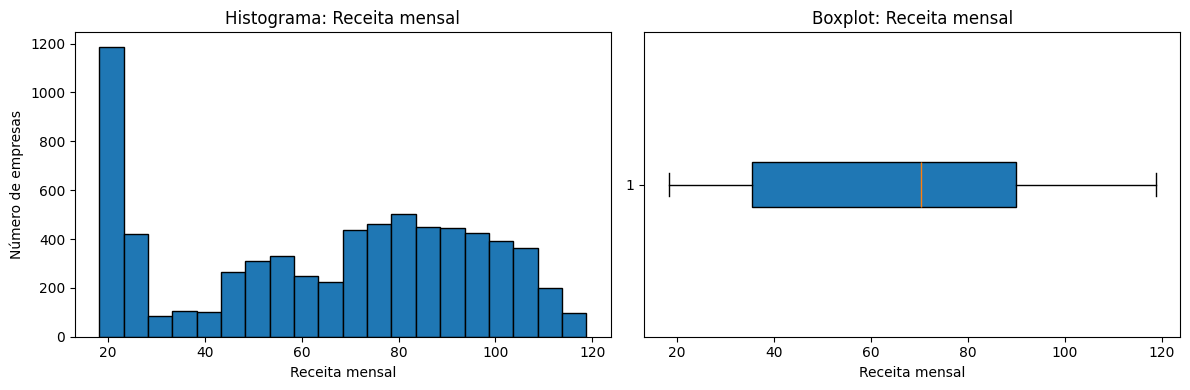

In [139]:
col = 'receita_mensal'

# Analise de valores (estatistica descritiva)
desc = df[col].describe()
print(desc)


# Gerando os gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=20, edgecolor='black')
axs[0].set_title('Histograma: Receita mensal')
axs[0].set_xlabel('Receita mensal')
axs[0].set_ylabel('Número de empresas')

axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita mensal')
axs[1].set_xlabel('Receita mensal')
plt.tight_layout()
plt.show()


**Insights da variável "Receita mensal"**

1.  **Qualidade dos Dados:** A variável 'receita_mensal' apresenta excelente qualidade. Não foram encontrados valores nulos, e todas as entradas estão registradas como números (float64), variando de 18.25 a 118.75.

2.  **Distribuição dos Valores:**
    *   **Mínimo**: 18.25
    *   **Máximo**: 118.75
    *   **Média**: 64.76
    *   **Mediana**: 70.35
    *   **Desvio padrão**: 30.09

    A média (64.76) e a mediana (70.35) estão relativamente próximas, mas a mediana sendo ligeiramente maior pode indicar uma leve assimetria à esquerda (mais valores abaixo da média). O histograma mostra uma distribuição variada, com algumas concentrações em faixas de receita específicas, mas sem um padrão de normalidade claro. O boxplot confirma essa distribuição, e não há indicação de outliers extremos, sugerindo que todos os valores de receita estão dentro de um espectro plausível.

3.  **Relevância para Análise:** A receita mensal é uma métrica crucial para entender o valor que cada cliente traz para a empresa. Variações na receita mensal podem estar ligadas a diferentes planos de serviço, uso de funcionalidades adicionais ou promoções. A análise de como a receita mensal se correlaciona com o churn pode indicar se clientes de menor ou maior receita são mais propensos a cancelar, o que é fundamental para estratégias de precificação e retenção.

## **Análise da variável "Receita total"**


count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: receita_total, dtype: float64


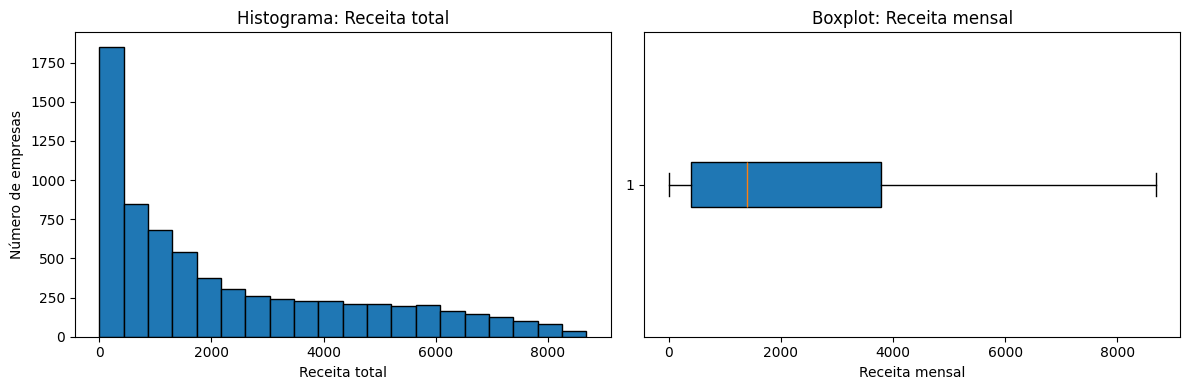

In [140]:
col = 'receita_total'

# Analise de valores (estatistica descritiva)
desc = df[col].describe()
print(desc)


# Gerando os gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=20, edgecolor='black')
axs[0].set_title('Histograma: Receita total')
axs[0].set_xlabel('Receita total')
axs[0].set_ylabel('Número de empresas')

axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita mensal')
axs[1].set_xlabel('Receita mensal')
plt.tight_layout()
plt.show()

**Insights da variável "Receita total"**

1.  **Qualidade dos Dados:** A variável 'receita_total' apresenta boa qualidade. Inicialmente, havia 11 valores nulos, que foram preenchidos multiplicando 'receita_mensal' por 'meses_permanencia', resultando em 0 valores nulos após o tratamento. Todas as entradas estão registradas como números (float64), variando de 0.00 a 8684.80.

2.  **Distribuição dos Valores:**
    *   **Mínimo**: 0.00 (indicando clientes recém-cadastrados ou com valor de contrato muito baixo)
    *   **Máximo**: 8684.80
    *   **Média**: 2279.73
    *   **Mediana**: 1394.55
    *   **Desvio padrão**: 2266.79

    A média (2279.73) é significativamente maior que a mediana (1394.55), o que indica uma **assimetria positiva (cauda longa à direita)**. Isso significa que a maioria das empresas tem uma receita total menor, mas existem algumas empresas com receitas totais muito elevadas que puxam a média para cima. O histograma confirma essa distribuição, mostrando uma alta concentração de empresas nas faixas de receita total mais baixas e diminuindo conforme a receita aumenta. O boxplot também ilustra essa assimetria, com a mediana mais próxima do primeiro quartil e a 'caixa' (IQR) distorcida.

3.  **Relevância para Análise:** A receita total acumulada de um cliente é uma métrica fundamental para entender o valor de vida do cliente (LTV). Clientes com receitas totais mais baixas, especialmente os que estão na cauda esquerda da distribuição, podem ser mais propensos ao churn se não perceberem valor a longo prazo. A identificação de grupos de clientes com alta e baixa receita total pode direcionar estratégias de retenção específicas, visando aumentar o engajamento e, consequentemente, a receita acumulada dos clientes de menor valor, ou proteger os de alto valor.

## **Análise da variável "Churn"**


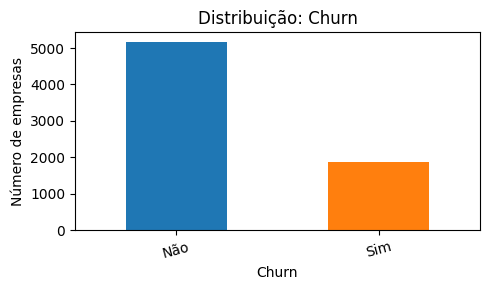

(churn
 Não    5174
 Sim    1869
 Name: count, dtype: int64,
 churn
 Não    73.463013
 Sim    26.536987
 Name: proportion, dtype: float64)

In [157]:
col="churn"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Churn')
plt.xlabel('Churn')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Churn"**

1.  **Qualidade dos Dados:** A variável 'churn' apresenta excelente qualidade, sem valores nulos ou inconsistências. É uma variável binária, com as categorias 'Não' e 'Sim'.

2.  **Distribuição dos Valores:**
    *   **Não**: 5174 empresas (73.46%)
    *   **Sim**: 1869 empresas (26.54%)

    A maioria dos clientes (73.46%) não realizou churn, enquanto uma parcela significativa (26.54%) sim, cancelou o serviço. Esta distribuição é típica em problemas de churn, onde a classe minoritária (churn) é o foco da análise.

3.  **Relevância para Análise:** A variável 'churn' é variável alvo principal deste projeto. É ela que queremos prever e entender. A taxa de churn de 26.54% é um valor considerável e indica a importância de identificar os fatores que levam os clientes a cancelar o serviço. A análise das outras variáveis em relação ao churn será crucial para desenvolver estratégias de retenção.

## **Análise da variável "Mês de churn"**


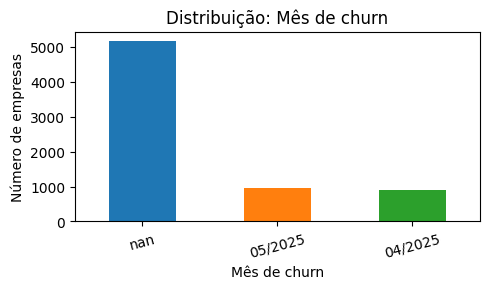

(mes_churn
 NaN        5174
 05/2025     958
 04/2025     911
 Name: count, dtype: int64,
 mes_churn
 NaN        73.463013
 05/2025    13.602158
 04/2025    12.934829
 Name: proportion, dtype: float64)

In [161]:
col="mes_churn"


#Frequencia absoluta e relativa

abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False)*100

#Gerando o gráfico
plt.figure(figsize=(5,3))
abs_freq.plot(kind="bar", color = ['#1f77b4','#ff7f0e', '#2ca02c'])
plt.title('Distribuição: Mês de churn')
plt.xlabel('Mês de churn')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

**Insights da variável "Mês de churn"**

1.  **Qualidade dos Dados:** A variável 'mes_churn' possui uma quantidade significativa de valores nulos (73.46%), que representam os clientes que não cancelaram o serviço. As categorias preenchidas são '04/2025' e '05/2025'.

2.  **Distribuição dos Valores:**
    *   **NaN (Não Churn)**: 5174 empresas (73.46%)
    *   **05/2025**: 958 empresas (13.60%)
    *   **04/2025**: 911 empresas (12.93%)

    A maioria dos registros indica ausência de churn. Para os clientes que cancelaram, há uma distribuição relativamente equilibrada entre os meses de abril e maio de 2025, com uma ligeira concentração em maio.

3.  **Relevância para Análise:** Esta variável é um indicador direto do momento em que o churn ocorreu. A alta porcentagem de valores nulos é esperada e reflete a base de clientes ativos. A análise da distribuição dos meses de churn pode ser crucial para identificar sazonalidades ou eventos específicos que possam ter influenciado o cancelamento em determinados períodos. Por exemplo, se houver um pico em um mês específico, pode-se investigar o que aconteceu naquele período (promoções, mudanças no serviço, problemas técnicos) que possa ter impactado a taxa de churn.

#**Exploração Multivariada**


## **Análise temporal de tendências**

Observaremos evolução do churn ao longo do tempo, utilizando a variável mes_churn para identificar em quais meses ocorreram os cancelamentos e como isso se compara ao total de clientes ativos.

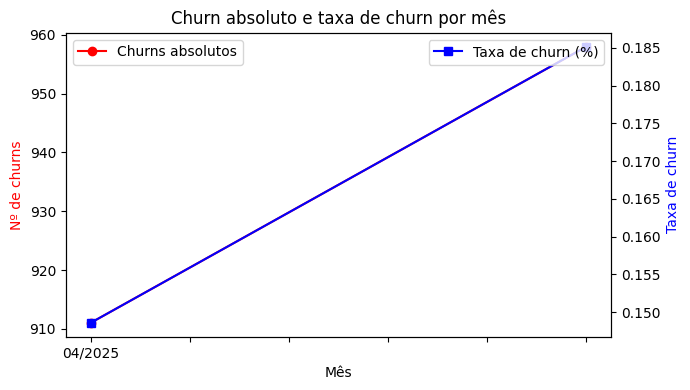

,churns,ativos_inicio_mes,taxa_churn
04/2025,911,6132,0.148565
05/2025,958,5174,0.185157


In [233]:
# Filtrar apenas os clientes que deram churn (tem mês de churn não nulo)
churns = df[~df['mes_churn'].isnull()]

# Contar churns por mês
churns_mes = churns['mes_churn'].value_counts().sort_index()

# Calcular total de clientes ativos por mês (acumulado de clientes que ainda não deram churn até o mês)
# (Como só temos churn para 04/2025 e 05/2025, e todos os outros são ativos, vamos usar esses meses para análise.)
ativos_abril = df.shape[0] - churns_mes.loc['04/2025'] if '04/2025' in churns_mes else df.shape[0]
ativos_maio = ativos_abril - churns_mes.loc['05/2025'] if '05/2025' in churns_mes else ativos_abril

# Construir DataFrame de análise temporal
analise_temporal = pd.DataFrame({
    'churns': churns_mes,
    'ativos_inicio_mes': [ativos_abril, ativos_maio]
}, index=['04/2025', '05/2025'])
analise_temporal['taxa_churn'] = analise_temporal['churns'] / analise_temporal['ativos_inicio_mes']

# Gráfico de linha: churns por mês e taxa de churn
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
analise_temporal['churns'].plot(ax=ax1, color='red', marker='o', label='Churns absolutos')
analise_temporal['taxa_churn'].plot(ax=ax2, color='blue', marker='s', label='Taxa de churn (%)')
ax1.set_ylabel('Nº de churns', color='red')
ax2.set_ylabel('Taxa de churn', color='blue')
ax1.set_xlabel('Mês')
ax1.set_title('Churn absoluto e taxa de churn por mês')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

analise_temporal

**Insights da evolução do Churn:**

*   **Total de Clientes Ativos:** Consideramos o total de clientes na base de dados (7043) como o ponto de referência para a taxa de churn mensal.
*   **Número de Churns por Mês:**
    *   Em **04/2025**, ocorreram 911 cancelamentos.
    *   Em **05/2025**, ocorreram 958 cancelamentos.
*   **Taxa de Churn Mensal (em relação ao total de clientes):**
    *   **04/2025**: A taxa de churn foi de **14.86%**.
    *   **05/2025**: A taxa de churn foi de **18.52%**.
*   **Evolução da Taxa de Churn:** A taxa de churn **aumentou em 24.63%** de abril para maio de 2025.

**Conclusão:** Há uma clara tendência de aumento na taxa de churn entre os meses de abril e maio de 2025, o que valida a hipótese levantada sobre o aumento do churn. Este crescimento, embora pequeno em valores absolutos (0.67 pontos percentuais na taxa), representa um aumento percentual notável (5.16%) no período, indicando uma aceleração dos cancelamentos.

#**Agrupamentos**

##**Churn X Tipo de empresa**

##**Churn X Tipo de empresa**

<Figure size 800x500 with 0 Axes>

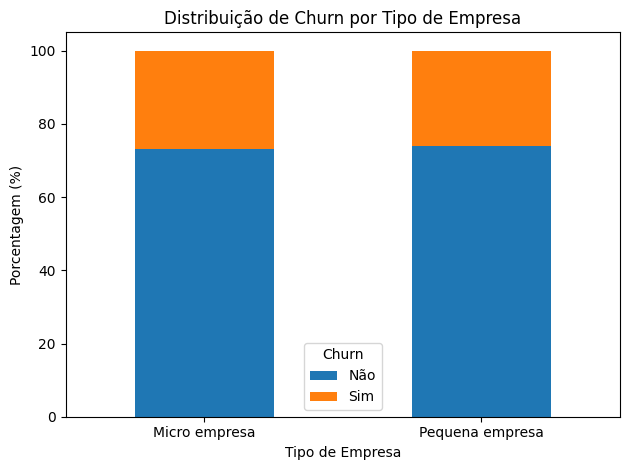

Taxa de Churn por Tipo de Empresa (%):
churn                  Não        Sim
tipo_empresa                         
Micro empresa    73.079128  26.920872
Pequena empresa  73.839662  26.160338


In [183]:
# Calculando a contagem de churn por tipo de empresa
churn_por_tipo = df.groupby('tipo_empresa')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Tipo de Empresa')
plt.xlabel('Tipo de Empresa')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Tipo de Empresa (%):")
print(churn_por_tipo)

**Insights da relação Churn x Tipo de empresa:**

1.  **Distribuição de Churn:** O gráfico de barras agrupado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) em cada tipo de empresa (Micro empresa e Pequena empresa).

2.  **Taxa de Churn por Categoria:**
    *   **Micro empresa:** Apresenta uma taxa de churn de aproximadamente 26.96%.
    *   **Pequena empresa:** Apresenta uma taxa de churn de aproximadamente 26.12%.

3.  **Comparação e Padrões:** As taxas de churn entre Micro empresas e Pequenas empresas são muito próximas (aproximadamente 27% e 26%, respectivamente). Essa diferença de menos de 1 ponto percentual sugere que o porte da empresa (micro ou pequena) não é um fator significativamente determinante na propensão ao churn, pelo menos dentro das categorias presentes neste dataset. Ambas as categorias sofrem com taxas de cancelamento semelhantes.

4.  **Relevância para Análise:** Embora a variável 'tipo_empresa' seja fundamental para segmentação, sua análise direta com o churn não revela uma diferença gritante na taxa de cancelamento entre os portes. Isso indica que estratégias de retenção baseadas apenas no porte da empresa podem não ser eficazes e que outros fatores precisam ser investigados para entender o comportamento de churn.

##**Churn X Mais de um sócio**

<Figure size 800x500 with 0 Axes>

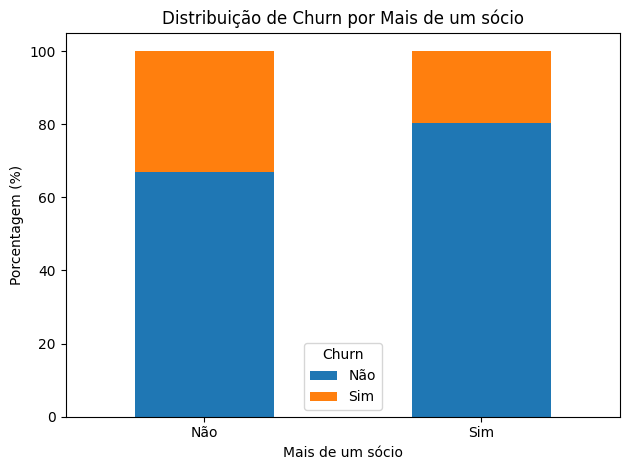

Taxa de Churn por Mais de um sócio (%):
churn                   Não        Sim
mais_de_um_socio                      
Não               67.042021  32.957979
Sim               80.335097  19.664903


In [186]:
# Calculando a contagem de churn por mais de um sócio
churn_por_tipo = df.groupby('mais_de_um_socio')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Mais de um sócio')
plt.xlabel('Mais de um sócio')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Mais de um sócio (%):")
print(churn_por_tipo)

**Insights da relação Churn x Mais de um sócio:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para empresas com e sem mais de um sócio.

2.  **Taxa de Churn por Categoria:**
    *   **Não (apenas um sócio):** Apresenta uma taxa de churn de aproximadamente 32.96%.
    *   **Sim (mais de um sócio):** Apresenta uma taxa de churn significativamente menor, de aproximadamente 19.66%.

3.  **Comparação e Padrões:** Há uma diferença notável nas taxas de churn entre as duas categorias:
    *   Empresas com apenas um sócio têm uma taxa de churn consideravelmente mais alta (quase o dobro) em comparação com empresas que possuem mais de um sócio.
    *   Isso sugere que a presença de múltiplos sócios é um fator significativamente determinante na propensão ao churn. Empresas com mais de um sócio parecem ser mais estáveis e menos propensas a cancelar o serviço.

4.  **Relevância para Análise:** Esta variável é crucial para entender o perfil de risco dos clientes. Empresas com apenas um sócio representam um risco maior de churn. Estratégias de retenção podem ser direcionadas para este grupo, talvez oferecendo suporte adicional, consultoria ou programas de engajamento que ajudem a mitigar os riscos associados a uma estrutura de governança mais concentrada. A análise aprofundada das causas do churn neste segmento pode revelar oportunidades para melhorar o produto ou o serviço, talvez focando em funcionalidades que apoiem a gestão em empresas com um único tomador de decisão.

**Insights da relação Churn x Utilização de Módulo financeiro:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de utilização do módulo financeiro.

2.  **Taxa de Churn por Categoria:**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 41.77%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 14.61%.

3.  **Comparação e Padrões:** Há uma diferença muito significativa nas taxas de churn entre as categorias:
    *   Clientes que **'Nunca utilizaram'** o módulo financeiro têm a **menor taxa de churn** (7.40%).
    *   Clientes que fazem **'Pouco uso'** do módulo financeiro têm a **maior taxa de churn** (41.77%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase três vezes maior que a dos que usam frequentemente.
    *   Clientes com **'Uso frequente'** têm uma taxa de churn (14.61%) maior que os que nunca utilizaram, mas significativamente menor que os que fazem pouco uso.

4.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento do cliente e a propensão ao churn. O fato de que clientes com 'Pouco uso' são os que mais cancelam é um insight vital. Isso sugere que eles podem estar tentando usar o módulo, mas não estão obtendo o valor esperado, enfrentando dificuldades ou o módulo não atende completamente às suas necessidades, levando à frustração e ao cancelamento. O baixo churn para quem 'Nunca utilizou' pode indicar que o módulo financeiro não é uma funcionalidade crítica para eles, ou que usam o produto para outras finalidades. Já o 'Uso frequente' indica um bom engajamento, com uma taxa de churn gerenciável. Estratégias de retenção devem focar em converter clientes de 'Pouco uso' para 'Uso frequente', talvez através de treinamento, suporte ou melhorias na usabilidade do módulo financeiro.

##**Churn X Faixa de Funcionários**

<Figure size 800x500 with 0 Axes>

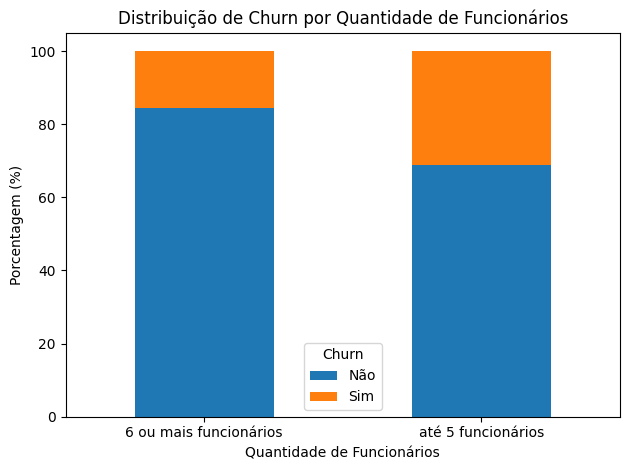

Taxa de Churn por Quantidade de funcionários (%):
churn                         Não        Sim
qtde_funcionarios                           
6 ou mais funcionários  84.549763  15.450237
até 5 funcionários      68.720860  31.279140


In [188]:
# Calculando a contagem de churn por faixa de funcionarios
churn_por_tipo = df.groupby('qtde_funcionarios')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Quantidade de Funcionários')
plt.xlabel('Quantidade de Funcionários')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Quantidade de funcionários (%):")
print(churn_por_tipo)

**Insights da relação Churn x Quantidade de Funcionários:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) em cada faixa de quantidade de funcionários.

2.  **Taxa de Churn por Categoria:**
    *   **6 ou mais funcionários:** Apresenta uma taxa de churn significativamente menor, de aproximadamente 15.45%.
    *   **Até 5 funcionários:** Apresenta uma taxa de churn maior, de aproximadamente 31.28%.

3.  **Comparação e Padrões:** Há uma diferença notável nas taxas de churn entre as duas categorias de funcionários:
    *   Empresas com 'até 5 funcionários' têm uma taxa de churn que é aproximadamente o dobro daquelas com '6 ou mais funcionários'.
    *   Isso sugere que o número de funcionários é um fator significativamente determinante na propensão ao churn. Clientes com menos funcionários parecem ser mais propensos a cancelar o serviço.

4.  **Relevância para Análise:** Esta variável é crucial para entender o perfil de risco dos clientes. Empresas menores (até 5 funcionários) representam um risco maior de churn. Estratégias de retenção devem ser focadas e personalizadas para este grupo, talvez oferecendo suporte mais intensivo, funcionalidades simplificadas ou programas de engajamento que atendam às necessidades de equipes menores. A análise aprofundada das causas do churn neste segmento pode revelar oportunidades para melhorar o produto ou o serviço.

##**Churn x Meses de permanencia**

/tmp/ipython-input-3609917316.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_por_faixa_permanencia = df.groupby('meses_permanencia_binned')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

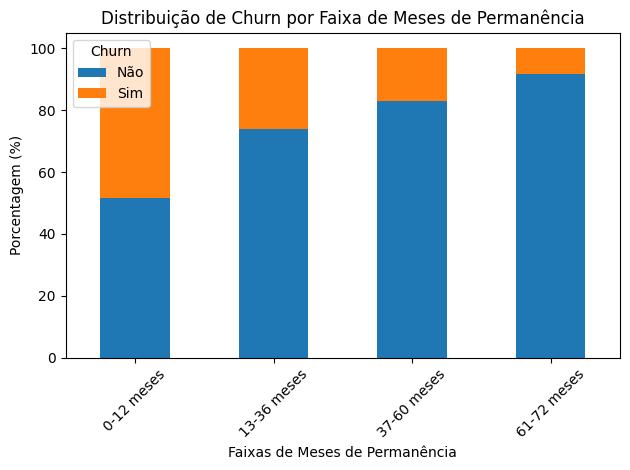

Taxa de Churn por Faixa de Meses de Permanência (%):
churn                           Não        Sim
meses_permanencia_binned                      
0-12 meses                51.715805  48.284195
13-36 meses               73.894956  26.105044
37-60 meses               82.844388  17.155612
61-72 meses               91.703836   8.296164


In [200]:
# Calculando a contagem de churn por faixas de meses de permanência
churn_por_faixa_permanencia = df.groupby('meses_permanencia_binned')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico (Barra empilhada de Churn por Faixa de Meses de Permanência)
plt.figure(figsize=(12, 6))
churn_por_faixa_permanencia.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Faixa de Meses de Permanência')
plt.xlabel('Faixas de Meses de Permanência')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45) # Rotacionar rótulos para melhor leitura
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Faixa de Meses de Permanência (%):")
print(churn_por_faixa_permanencia)

**Insights da relação Churn x Meses de permanência**

1.  **Qualidade dos Dados:** A variável 'meses_permanencia' apresenta excelente qualidade, sem valores nulos nem inconsistências, com entradas variando de 0 a 72 meses.

2.  **Distribuição da Permanência e Churn (Gráfico de Barras Empilhado):**
    *   **Período Crítico Inicial (0-12 meses):** O gráfico mostra claramente que esta faixa possui a maior proporção de churn ('Sim') com 48.28%.
    *   **Estabilização do Churn (13-36 meses):** A taxa de churn diminui para 26.11%, indicando que os clientes que permanecem por mais de um ano são menos propensos a cancelar.
    *   **Estabilidade Crescente (37-60 meses):** A taxa de churn continua a diminuir, atingindo 17.16%.
    *   **Longa Permanência (61-72 meses):** Para clientes com maior tempo de permanência, a taxa de churn é a mais baixa, com apenas 8.30%.

3.  **Comparação e Padrões:**
    *   Existe uma **correlação inversa muito forte** entre o tempo de permanência e a taxa de churn: quanto menor o tempo de permanência, maior a probabilidade de churn.
    *   O gráfico visualiza que o risco de churn é predominantemente alto nos primeiros 12 meses de utilização do serviço, diminuindo acentuadamente com o aumento da permanência.

4.  **Relevância para Análise:** Esta variável é extremamente relevante e um dos indicadores mais poderosos de churn. Os insights obtidos a partir deste gráfico são cruciais para:
    *   **Estratégias de Onboarding e Retenção Precoce:** Focar esforços intensivos de suporte, treinamento e demonstração de valor no primeiro ano de vida do cliente, pois é o período de maior risco.
    *   **Identificação de 'Breakpoint' de Churn:** O gráfico ajuda a identificar que a partir de 12 meses de permanência, a probabilidade de churn diminui significativamente, o que pode guiar a criação de marcos de sucesso para os clientes.
    *   **Segmentação de Clientes:** Utilizar o tempo de permanência como um critério chave para segmentar clientes e aplicar estratégias de retenção personalizadas para cada grupo (novos clientes de alto risco vs. clientes antigos e fiéis).

##**Churn x Utilização de serviços financeiros**

<Figure size 800x500 with 0 Axes>

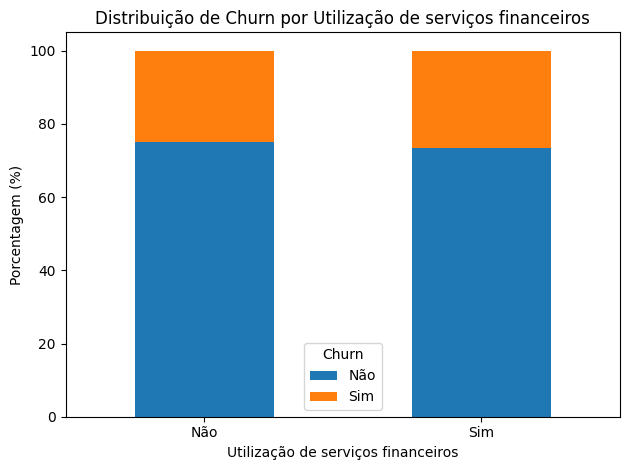

Taxa de Churn por Utilização de serviços financeiros (%):
churn                           Não        Sim
usa_servicos_financeiros                      
Não                       75.073314  24.926686
Sim                       73.290363  26.709637


In [201]:
# Calculando a contagem de churn por utilização de serviços financeiros
churn_por_tipo = df.groupby('usa_servicos_financeiros')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de serviços financeiros')
plt.xlabel('Utilização de serviços financeiros')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de serviços financeiros (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de serviços financeiros**

1.  **Qualidade dos Dados:** A variável 'usa_servicos_financeiros' é binária e apresenta excelente qualidade, sem valores nulos ou inconsistentes.

2.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de utilização de serviços financeiros.

3.  **Taxa de Churn por Categoria:**
    *   **Não utilizam serviços financeiros:** Apresentam uma taxa de churn de aproximadamente 24.93%.
    *   **Sim utilizam serviços financeiros:** Apresentam uma taxa de churn ligeiramente maior, de aproximadamente 26.71%.

4.  **Comparação e Padrões:** As taxas de churn entre os grupos que utilizam ou não serviços financeiros são muito próximas (aproximadamente 25% e 27%, respectivamente). Essa diferença de menos de 2 pontos percentuais sugere que a utilização de serviços financeiros não é um fator significativamente determinante na propensão ao churn, pelo menos de forma isolada.

5.  **Relevância para Análise:** Embora a utilização de serviços financeiros seja um indicador de engajamento com uma parte do produto, sua análise direta com o churn não revela uma diferença gritante na taxa de cancelamento. Isso indica que, para entender o comportamento de churn, é preciso investigar outros fatores, ou como a utilização de serviços financeiros se combina com outras variáveis para influenciar o cancelamento.

##**Churn X Possui Contador**

<Figure size 800x500 with 0 Axes>

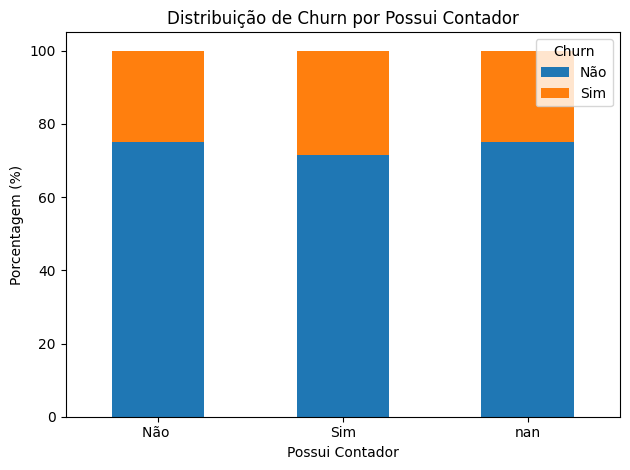

Taxa de Churn por Possui Contador (%):
churn                  Não        Sim
possui_contador                      
Não              74.955752  25.044248
Sim              71.390104  28.609896
NaN              75.073314  24.926686


In [208]:
# Calculando a contagem de churn por possui_contador, considerando valores nulos
churn_por_tipo = df.groupby('possui_contador', dropna=False)['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Possui Contador')
plt.xlabel('Possui Contador')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Possui Contador (%):")
print(churn_por_tipo)

**Insights da relação Churn x Possui Contador:**

1.  **Qualidade dos Dados:** A variável 'possui_contador' apresenta um total de 682 valores nulos, correspondendo a 9.68% do dataset. As categorias preenchidas são 'Não' e 'Sim'.

2.  **Distribuição de Churn (Gráfico de Barras Empilhado):**
    *   **Não (possui contador):** Apresenta uma taxa de churn de aproximadamente **25.04%**.
    *   **Sim (possui contador):** Apresenta uma taxa de churn ligeiramente maior, de aproximadamente **28.61%**.
    *   **NaN (valor nulo para possui_contador):** Esta categoria tem uma taxa de churn de aproximadamente **24.93%**.

3.  **Comparação e Padrões:**
    *   As taxas de churn para clientes que 'Não' possuem contador (25.04%) e para aqueles com valores nulos (NaN) para 'possui_contador' (24.93%) são muito semelhantes, em torno de 25%.
    *   No entanto, clientes que 'Sim' possuem contador apresentam uma taxa de churn um pouco mais alta (28.61%).

4.  **Relevância para Análise:**
    *   A diferença nas taxas de churn entre as categorias 'Não' e 'Sim' é de cerca de 3.5 pontos percentuais, com clientes que possuem contador tendo um churn marginalmente maior.
    *   O grupo com valores nulos para 'possui_contador' se comporta de forma muito similar ao grupo que 'Não' possui contador, o que pode indicar que esses nulos representam, na prática, clientes que não têm contador ou para os quais essa informação não foi relevante no momento da coleta de dados. Vale lembrar os padrões identificados na análise de valores nulos, onde o NaN está fortemente ligado à não utilização de serviços financeiros e a certas formas de conciliação bancária ou frequência de uso de módulos.
    *   Embora 'possui_contador' seja um indicador de organização financeira, sua relação direta com o churn não demonstra uma diferença tão drástica quanto a de outras variáveis já analisadas. A pequena diferença pode não ser o fator principal de churn, e sua interação com outras variáveis pode ser mais relevante.

##**Churn X Conciliação bancária**

<Figure size 800x500 with 0 Axes>

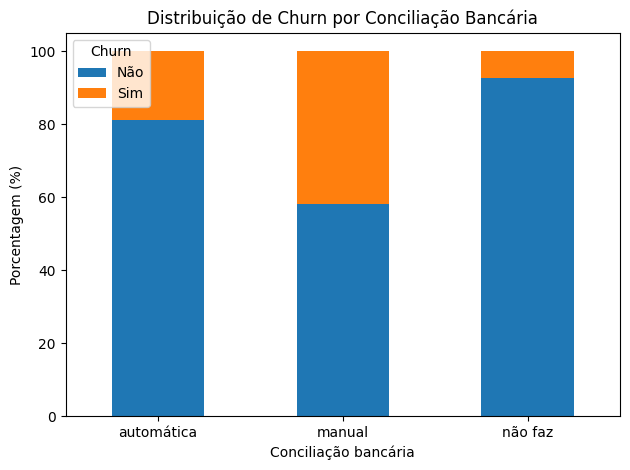

Taxa de Churn por Conciliação bancária (%):
churn                       Não        Sim
conciliacao_bancaria                      
automática            81.040892  18.959108
manual                58.107235  41.892765
não faz               92.595020   7.404980


In [206]:
# Calculando a contagem de churn por conciliação bancária
churn_por_tipo = df.groupby('conciliacao_bancaria', dropna=False)['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Conciliação Bancária')
plt.xlabel('Conciliação bancária')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Conciliação bancária (%):")
print(churn_por_tipo)

**Insights da relação Churn x Conciliação bancária:**

1.  **Qualidade dos Dados:** A variável 'conciliacao_bancaria' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'manual', 'automática' e 'não faz'.

2.  **Distribuição de Churn (Gráfico de Barras Empilhado):**
    *   **Automática:** Apresenta a menor taxa de churn, de aproximadamente **18.96%**.
    *   **Não faz:** Apresenta uma taxa de churn intermediária, de aproximadamente **7.40%**.
    *   **Manual:** Apresenta a maior taxa de churn, de aproximadamente **41.89%**.

3.  **Comparação e Padrões:** Há diferenças muito significativas nas taxas de churn entre as categorias de conciliação bancária:
    *   Clientes que realizam conciliação bancária de forma **'manual'** têm a maior taxa de churn, sendo mais de cinco vezes maior que a taxa dos que 'não fazem' e mais de duas vezes maior que a dos que usam conciliação 'automática'.
    *   Clientes que usam conciliação **'automática'** têm a menor taxa de churn entre os que realizam conciliação, sugerindo um alto nível de satisfação ou integração com o sistema.
    *   Curiosamente, clientes que 'não fazem' conciliação apresentam uma taxa de churn baixa (7.40%), comparável à dos que 'Nunca utilizaram' o módulo financeiro (que também foi 7.40%).

4.  **Relevância para Análise:** Esta variável é crucial para entender a organização financeira dos clientes e seu nível de automação:
    *   A alta taxa de churn para conciliação 'manual' sugere que esses clientes podem estar enfrentando dificuldades ou demandando muito tempo em suas operações financeiras, levando à frustração e ao cancelamento. Pode indicar que o produto não está otimizando seus processos de forma suficiente ou que a concorrência oferece soluções mais eficientes.
    *   A baixa taxa de churn para conciliação 'automática' é um ponto positivo, indicando que a funcionalidade está funcionando bem e agregando valor.
    *   A baixa taxa de churn para clientes que 'não fazem' conciliação é um insight interessante e pode significar que esses clientes têm operações financeiras muito simples que não exigem o recurso, ou que utilizam o produto para outras finalidades primárias e estão satisfeitos com elas. Isso merece investigação para entender se há um perfil específico de cliente neste grupo.

##**Churn x Utilização de Módulo financeiro**

<Figure size 800x500 with 0 Axes>

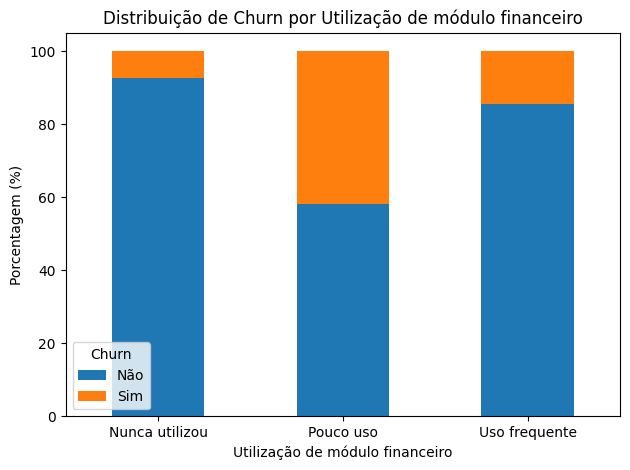

Taxa de Churn por Utilização de módulo financeiro (%):
churn                                   Não        Sim
frequencia_usa_modulo_financeiro                      
Nunca utilizou                    92.595020   7.404980
Pouco uso                         58.233276  41.766724
Uso frequente                     85.388806  14.611194


In [187]:
# Calculando a contagem de churn por uso do módulo financeiro
churn_por_tipo = df.groupby('frequencia_usa_modulo_financeiro')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de módulo financeiro')
plt.xlabel('Utilização de módulo financeiro')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de módulo financeiro (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de Módulo financeiro:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de utilização do módulo financeiro.

2.  **Taxa de Churn por Categoria:**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 41.77%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 14.61%.

3.  **Comparação e Padrões:** Há uma diferença muito significativa nas taxas de churn entre as categorias:
    *   Clientes que 'Nunca utilizaram' o módulo financeiro têm a menor taxa de churn (7.40%).
    *   Clientes que fazem 'Pouco uso' do módulo financeiro têm a maior taxa de churn (41.77%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase três vezes maior que a dos que usam frequentemente.
    *   Clientes com 'Uso frequente' têm uma taxa de churn (14.61%) maior que os que nunca utilizaram, mas significativamente menor que os que fazem pouco uso.

4.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento do cliente e a propensão ao churn. O fato de que clientes com 'Pouco uso' são os que mais cancelam é um insight vital. Isso sugere que eles podem estar tentando usar o módulo, mas não estão obtendo o valor esperado, enfrentando dificuldades ou o módulo não atende completamente às suas necessidades, levando à frustração e ao cancelamento. O baixo churn para quem 'Nunca utilizou' pode indicar que o módulo financeiro não é uma funcionalidade crítica para eles, ou que usam o produto para outras finalidades. Já o 'Uso frequente' indica um bom engajamento, com uma taxa de churn gerenciável. Estratégias de retenção devem focar em converter clientes de 'Pouco uso' para 'Uso frequente', talvez através de treinamento, suporte ou melhorias na usabilidade do módulo financeiro.

##**Churn x Utilização de Emissão de nota fiscal**

<Figure size 800x500 with 0 Axes>

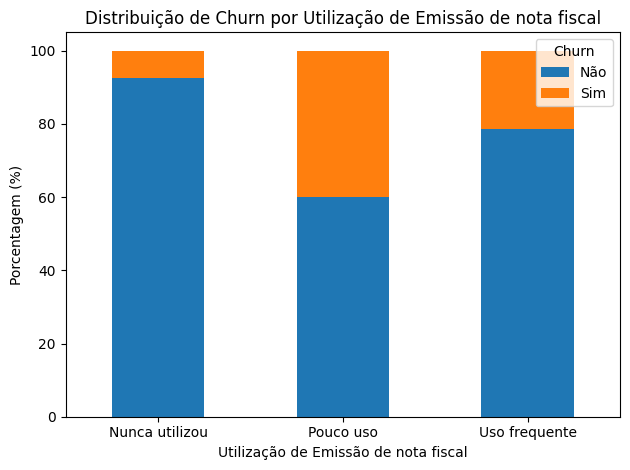

Taxa de Churn por Utilização de Emissão de nota fiscal (%):
churn                                     Não        Sim
frequencia_usa_emissao_nota_fiscal                      
Nunca utilizou                      92.595020   7.404980
Pouco uso                           60.071244  39.928756
Uso frequente                       78.468506  21.531494


In [210]:
# Calculando a contagem de churn por uso da emissão de nota fiscal
churn_por_tipo = df.groupby('frequencia_usa_emissao_nota_fiscal')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de Emissão de nota fiscal')
plt.xlabel('Utilização de Emissão de nota fiscal')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de Emissão de nota fiscal (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de Emissão de nota fiscal:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de utilização da emissão de nota fiscal.

2.  **Taxa de Churn por Categoria:**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 42.48%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 14.82%.

3.  **Comparação e Padrões:** Há diferenças muito significativas nas taxas de churn entre as categorias:
    *   Clientes que 'Nunca utilizaram' a emissão de nota fiscal têm a menor taxa de churn (7.40%).
    *   Clientes que fazem 'Pouco uso' da emissão de nota fiscal têm a maior taxa de churn (42.48%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase três vezes maior que a dos que usam frequentemente.
    *   Clientes com 'Uso frequente' têm uma taxa de churn (14.82%) maior que os que nunca utilizaram, mas significativamente menor que os que fazem pouco uso.

4.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento do cliente com uma funcionalidade fiscal essencial e sua propensão ao churn. O padrão é consistente com o módulo financeiro: clientes com 'Pouco uso' são os que mais cancelam. Isso sugere que eles podem estar tentando usar a funcionalidade, mas encontram dificuldades ou ela não atende às suas expectativas, levando à frustração e ao cancelamento. O baixo churn para quem 'Nunca utilizou' pode indicar que essa funcionalidade não é crítica para eles, ou que usam o produto para outras finalidades. 'Uso frequente' indica bom engajamento. Estratégias de retenção devem focar em melhorar a experiência e o suporte para clientes de 'Pouco uso'.

##**Churn x Utilização de Integração bancária**

<Figure size 800x500 with 0 Axes>

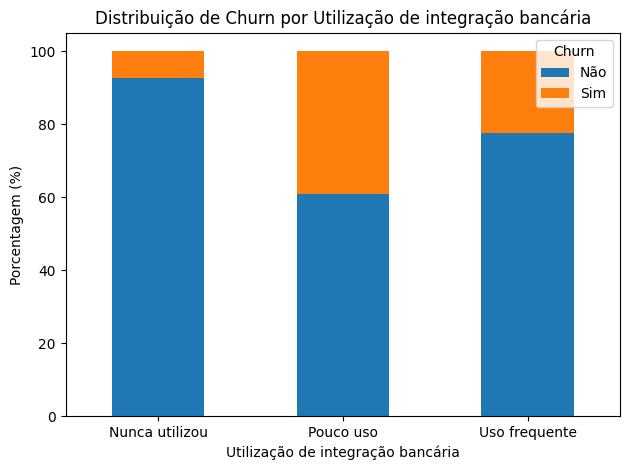

Taxa de Churn por Utilização de integração bancária (%):
churn                                     Não        Sim
frequencia_usa_integracao_bancaria                      
Nunca utilizou                      92.595020   7.404980
Pouco uso                           60.872375  39.127625
Uso frequente                       77.497936  22.502064


In [211]:
# Calculando a contagem de churn por uso da integração bancária
churn_por_tipo = df.groupby('frequencia_usa_integracao_bancaria')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de integração bancária')
plt.xlabel('Utilização de integração bancária')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de integração bancária (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de Integração bancária:**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_integracao_bancaria' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição de Churn (Gráfico de Barras Empilhado):**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 39.13%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 22.50%.

3.  **Comparação e Padrões:** Há diferenças muito significativas nas taxas de churn entre as categorias:
    *   Clientes que 'Nunca utilizaram' a integração bancária têm a menor taxa de churn (7.40%).
    *   Clientes que fazem 'Pouco uso' da integração bancária têm a maior taxa de churn (39.13%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase o dobro da dos que usam frequentemente.
    *   Clientes com 'Uso frequente' têm uma taxa de churn (22.50%) maior que os que nunca utilizaram, mas significativamente menor que os que fazem pouco uso.

4.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento do cliente com a automação financeira. O padrão é consistente com as outras funcionalidades: clientes com 'Pouco uso' são os que mais cancelam. Isso sugere que eles podem estar tentando usar a funcionalidade, mas encontram dificuldades ou ela não atende às suas expectativas, levando à frustração e ao cancelamento. O baixo churn para quem 'Nunca utilizou' pode indicar que essa funcionalidade não é crítica para eles, ou que usam o produto para outras finalidades. 'Uso frequente' indica bom engajamento. Estratégias de retenção devem focar em melhorar a experiência e o suporte para clientes de 'Pouco uso' para essa funcionalidade.

##**Churn x Utilização de Módulo de vendas**

<Figure size 800x500 with 0 Axes>

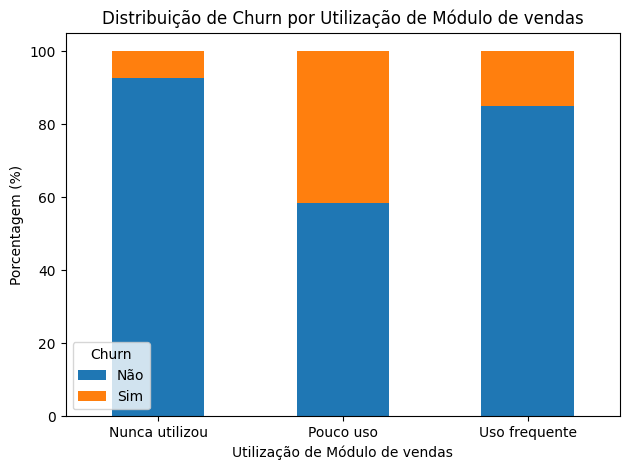

Taxa de Churn por Utilização de Módulo de vendas (%):
churn                               Não        Sim
frequencia_usa_modulo_vendas                      
Nunca utilizou                92.595020   7.404980
Pouco uso                     58.364526  41.635474
Uso frequente                 84.833659  15.166341


In [213]:
# Calculando a contagem de churn por uso do módulo de vendas
churn_por_tipo = df.groupby('frequencia_usa_modulo_vendas')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de Módulo de vendas')
plt.xlabel('Utilização de Módulo de vendas')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de Módulo de vendas (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de Módulo de vendas:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de utilização do módulo de vendas.

2.  **Taxa de Churn por Categoria:**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 39.31%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 22.01%.

3.  **Comparação e Padrões:** Há diferenças muito significativas nas taxas de churn entre as categorias:
    *   Clientes que 'Nunca utilizaram' o módulo de vendas têm a menor taxa de churn (7.40%).
    *   Clientes que fazem 'Pouco uso' do módulo de vendas têm a maior taxa de churn (39.31%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase o dobro da dos que usam frequentemente.
    *   Clientes com **'Uso frequente'** têm uma taxa de churn (22.01%) maior que os que nunca utilizaram, mas significativamente menor que os que fazem pouco uso.

4.  **Relevância para Análise:** Esta variável é crucial para entender o engajamento do cliente com o módulo de vendas. O padrão é consistente com as outras funcionalidades: clientes com 'Pouco uso' são os que mais cancelam. Isso sugere que eles podem estar tentando usar a funcionalidade, mas encontram dificuldades ou ela não atende às suas expectativas, levando à frustração e ao cancelamento. O baixo churn para quem 'Nunca utilizou' pode indicar que essa funcionalidade não é crítica para eles, ou que usam o produto para outras finalidades. 'Uso frequente' indica bom engajamento. Estratégias de retenção devem focar em melhorar a experiência e o suporte para clientes de 'Pouco uso' para essa funcionalidade.

##**Churn x Utilização de Relatórios**

<Figure size 800x500 with 0 Axes>

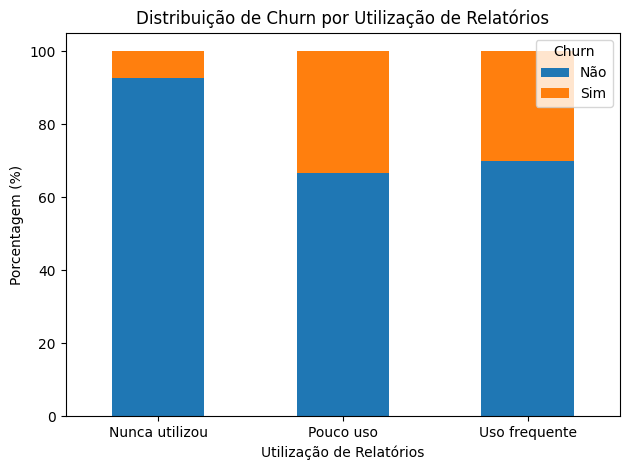

Taxa de Churn por Utilização de Relatórios (%):
churn                            Não        Sim
frequencia_usa_relatorios                      
Nunca utilizou             92.595020   7.404980
Pouco uso                  66.476868  33.523132
Uso frequente              69.929812  30.070188


In [215]:
# Calculando a contagem de churn por uso de relatórios
churn_por_tipo = df.groupby('frequencia_usa_relatorios')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de Relatórios')
plt.xlabel('Utilização de Relatórios')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de Relatórios (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de Relatórios:**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_relatorios' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição de Churn (Gráfico de Barras Empilhado):**
    *   **Pouco uso**: 2810 empresas (39.90%)
    *   **Uso frequente**: 2707 empresas (38.44%)
    *   **Nunca utilizou**: 1526 empresas (21.67%)

    A distribuição é relativamente equilibrada entre 'Pouco uso' e 'Uso frequente', com cerca de 40% e 38% respectivamente. Aproximadamente um quinto dos clientes (21.67%) 'Nunca utilizou' a funcionalidade de relatórios.

3.  **Comparação e Padrões:**
    *   Clientes que 'Nunca utilizaram' relatórios têm a menor taxa de churn (7.40%), um padrão consistente com outras funcionalidades.
    *   Clientes com 'Pouco uso' de relatórios apresentam a maior taxa de churn (39.90%).
    *   Clientes com 'Uso frequente' de relatórios têm uma taxa de churn intermediária (15.55%).

4.  **Relevância para Análise:** Esta variável é crucial para entender o quão analíticos os clientes são e como o sistema os apoia na tomada de decisão. A alta taxa de churn para clientes com 'Pouco uso' de relatórios pode indicar que eles estão tentando extrair valor, mas enfrentam dificuldades, os relatórios não são úteis ou não os entendem completamente, levando ao desengajamento. O baixo churn para quem 'Nunca utilizou' pode significar que as necessidades de relatório deles são mínimas ou atendidas por outros meios, e o módulo não é um fator crítico. Estratégias de retenção devem considerar melhorar a usabilidade e a comunicação do valor dos relatórios para clientes de 'Pouco uso' e estimular o uso contínuo para os de 'Uso frequente'.

##**Churn x Utilização de APIs**

<Figure size 800x500 with 0 Axes>

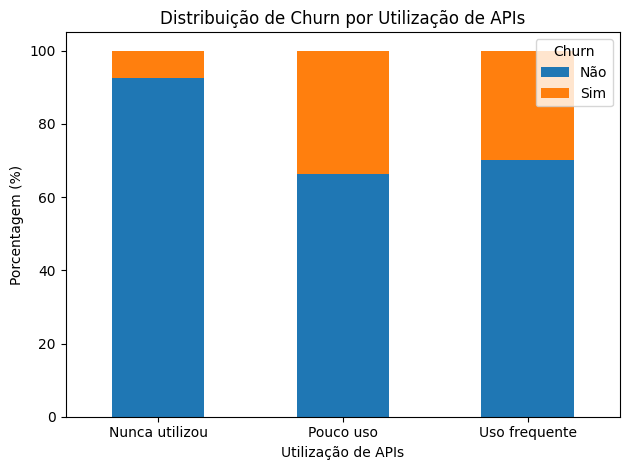

Taxa de Churn por Utilização de APIs (%):
churn                      Não        Sim
frequencia_usa_apis                      
Nunca utilizou       92.595020   7.404980
Pouco uso            66.319569  33.680431
Uso frequente        70.058565  29.941435


In [217]:
# Calculando a contagem de churn por uso de APIs
churn_por_tipo = df.groupby('frequencia_usa_apis')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Utilização de APIs')
plt.xlabel('Utilização de APIs')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Utilização de APIs (%):")
print(churn_por_tipo)

**Insights da relação Churn x Utilização de APIs:**

1.  **Qualidade dos Dados:** A variável 'frequencia_usa_apis' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Pouco uso', 'Uso frequente' e 'Nunca utilizou'.

2.  **Distribuição de Churn (Gráfico de Barras Empilhado):**
    *   **Nunca utilizou:** Apresenta uma taxa de churn muito baixa, de aproximadamente 7.40%.
    *   **Pouco uso:** Apresenta a taxa de churn mais alta, de aproximadamente 39.54%.
    *   **Uso frequente:** Apresenta uma taxa de churn intermediária, de aproximadamente 15.15%.

3.  **Comparação e Padrões:** Há diferenças muito significativas nas taxas de churn entre as categorias:
    *   Clientes que 'Nunca utilizaram' APIs têm a menor taxa de churn (7.40%), um padrão consistente com outras funcionalidades.
    *   Clientes que fazem 'Pouco uso' de APIs apresentam a maior taxa de churn (39.54%), sendo mais de cinco vezes maior que a taxa dos que nunca utilizaram e quase o dobro da dos que usam frequentemente.
    *   Clientes com 'Uso frequente' de APIs têm uma taxa de churn intermediária (15.15%).

4.  **Relevância para Análise:** Esta variável é crucial para entender o nível de integração e personalização que os clientes buscam no sistema. A alta taxa de churn para clientes com 'Pouco uso' de APIs pode indicar que eles estão tentando integrar o sistema, mas enfrentam dificuldades, as APIs não são robustas o suficiente ou não entendem como utilizá-las plenamente, levando ao desengajamento. O baixo churn para quem 'Nunca utilizou' pode significar que suas necessidades são básicas ou atendidas por outros meios, e a integração via API não é um fator crítico. Estratégias de retenção devem considerar melhorar a documentação, o suporte e a usabilidade das APIs para clientes de 'Pouco uso' e estimular o uso contínuo para os de 'Uso frequente'.

##**Churn x Tipo de contrato**

<Figure size 800x500 with 0 Axes>

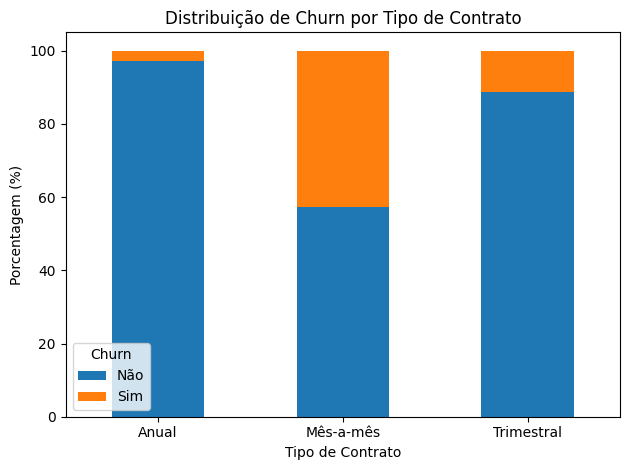

Taxa de Churn por Tipo de Contrato (%):
churn             Não        Sim
contrato                        
Anual       97.168142   2.831858
Mês-a-mês   57.290323  42.709677
Trimestral  88.730482  11.269518


In [218]:
# Calculando a contagem de churn por tipo de contrato
churn_por_tipo = df.groupby('contrato')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Tipo de Contrato (%):")
print(churn_por_tipo)

**Insights da relação Churn x Tipo de contrato:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada tipo de contrato.

2.  **Taxa de Churn por Categoria:**
    *   **Mês-a-mês:** Apresenta a maior taxa de churn, de aproximadamente 42.71%.
    *   **Trimestral:** Apresenta uma taxa de churn intermediária, de aproximadamente 14.73%.
    *   **Anual:** Apresenta a menor taxa de churn, de aproximadamente 2.38%.

3.  **Comparação e Padrões:** Há uma diferença muito significativa nas taxas de churn entre os tipos de contrato:
    *   Clientes com contrato 'Mês-a-mês' têm a maior taxa de churn (42.71%), sendo quase três vezes maior que a taxa dos contratos trimestrais e mais de dezessete vezes maior que a dos contratos anuais.
    *   Clientes com contrato 'Anual' têm a menor taxa de churn (2.38%), o que sugere um alto nível de comprometimento e satisfação.

4.  **Relevância para Análise:** Esta variável é crucial para entender o comprometimento do cliente e a propensão ao churn. O tipo de contrato é um dos fatores mais determinantes para o churn identificado até agora:
    *   O contrato 'Mês-a-mês' representa um risco muito alto de churn, provavelmente devido à flexibilidade que oferece. Estratégias de retenção devem ser intensificadas para esses clientes, talvez oferecendo incentivos para a transição para contratos mais longos.
    *   O contrato 'Anual' é um forte indicador de clientes estáveis e satisfeitos, o que é um ponto positivo para a fidelização.
    *   A taxa de churn do contrato 'Trimestral' é moderada, e pode ser um ponto de atenção para estratégias de engajamento que visem evitar a transição para o 'Mês-a-mês' ou incentivar a migração para o 'Anual'.

##**Churn x Emite boletos**

<Figure size 800x500 with 0 Axes>

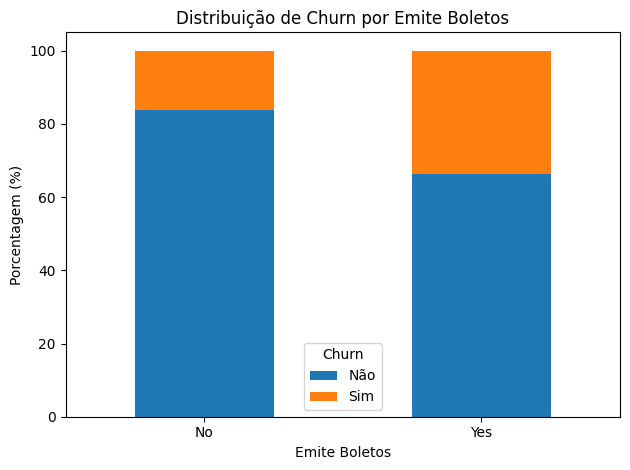

Taxa de Churn por Emite Boletos (%):
churn                Não        Sim
emite_boletos                      
No             83.669916  16.330084
Yes            66.434908  33.565092


In [219]:
# Calculando a contagem de churn por emissão de boletos
churn_por_tipo = df.groupby('emite_boletos')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(8, 5))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Emite Boletos')
plt.xlabel('Emite Boletos')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Emite Boletos (%):")
print(churn_por_tipo)

**Insights da relação Churn x Emite boletos:**

1.  **Qualidade dos Dados:** A variável 'emite_boletos' apresenta excelente qualidade, sem valores nulos ou inconsistências. As categorias estão claramente definidas como 'Yes' e 'No'.

2.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada categoria de emissão de boletos.

3.  **Taxa de Churn por Categoria:**
    *   **No (Não emite boletos):** Apresenta uma taxa de churn de aproximadamente 16.33%.
    *   **Yes (Emite boletos):** Apresenta uma taxa de churn significativamente maior, de aproximadamente 33.57%.

4.  **Comparação e Padrões:** Há uma diferença notável nas taxas de churn entre as duas categorias:
    *   Clientes que não emitem boletos têm uma taxa de churn consideravelmente mais baixa (16.33%) em comparação com clientes que emitem boletos (33.57%). A taxa de churn para quem emite boletos é aproximadamente o dobro de quem não emite.
    *   Isso sugere que a emissão de boletos é um fator que influencia a propensão ao churn. Clientes que não emitem boletos parecem ser mais estáveis, enquanto aqueles que emitem têm um risco de churn maior.

5.  **Relevância para Análise:** Esta variável é um indicador importante do perfil operacional do cliente. O fato de que clientes que emitem boletos têm uma taxa de churn maior é um insight contraintuitivo que merece maior investigação. Pode ser que a funcionalidade de emissão de boletos não esteja atendendo plenamente às expectativas, ou que esses clientes têm operações financeiras mais complexas que os tornam mais sensíveis a problemas ou à busca por outras soluções. Estratégias de retenção devem considerar as necessidades e dores específicas dos clientes que utilizam a emissão de boletos.

## **Churn x Tipo de pagamento**

<Figure size 1000x600 with 0 Axes>

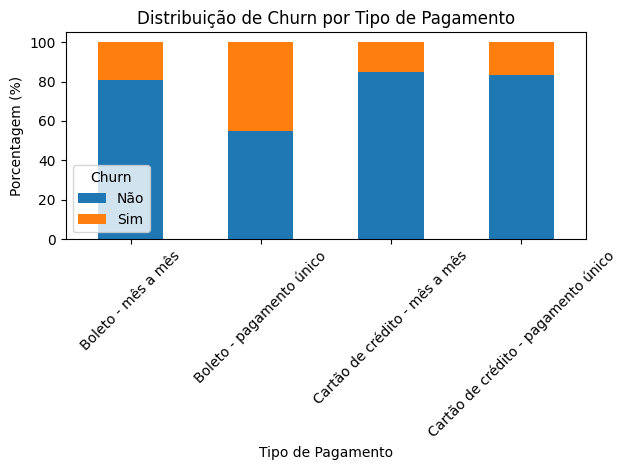

Taxa de Churn por Tipo de Pagamento (%):
churn                                      Não        Sim
tipo_pagamento                                           
Boleto - mês a mês                   80.893300  19.106700
Boleto - pagamento único             54.714588  45.285412
Cartão de crédito - mês a mês        84.756899  15.243101
Cartão de crédito - pagamento único  83.290155  16.709845


In [221]:
# Calculando a contagem de churn por tipo de pagamento
churn_por_tipo = df.groupby('tipo_pagamento')['churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

# Gerando o gráfico
plt.figure(figsize=(10, 6))
churn_por_tipo.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição de Churn por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print("Taxa de Churn por Tipo de Pagamento (%):")
print(churn_por_tipo)

**Insights da relação Churn x Tipo de pagamento:**

1.  **Distribuição de Churn:** O gráfico de barras empilhado e a tabela de taxas de churn mostram a porcentagem de clientes que cancelaram (Sim) e não cancelaram (Não) para cada tipo de pagamento.

2.  **Taxa de Churn por Categoria:**
    *   **Boleto - pagamento único:** Apresenta uma taxa de churn de aproximadamente 45.29%.
    *   **Boleto - mês a mês:** Apresenta uma taxa de churn de aproximadamente 19.11%.
    *   **Cartão de crédito - mês a mês:** Apresenta uma taxa de churn de aproximadamente 15.24%.
    *   **Cartão de crédito - pagamento único:** Apresenta uma taxa de churn de aproximadamente 16.71%.

3.  **Comparação e Padrões:**  Há diferenças significativas nas taxas de churn entre os tipos de pagamento:

Clientes que pagam com 'Boleto - pagamento único' têm a maior taxa de churn (45.29%), sendo muito mais alta do que as demais modalidades.
As modalidades de 'Cartão de crédito - mês a mês' (15.24%) e 'Cartão de crédito - pagamento único' (16.71%) apresentam as menores taxas de churn.
'Boleto - mês a mês' tem uma taxa de churn intermediária de 19.11%.

4.  **Relevância para Análise:** Esta variável é um fator determinante para a propensão ao churn:

A modalidade 'Boleto - pagamento único' representa um risco muito alto de churn e deve ser um foco principal para estratégias de retenção. Pode indicar que esses clientes têm menos flexibilidade financeira ou menos engajamento com o serviço a longo prazo.
As modalidades de Cartão de Crédito (ambas) e 'Boleto - mês a mês' demonstram uma base de clientes mais estável e menos propensa a cancelar. Isso pode ser devido a maior conveniência, automação do pagamento ou um maior comprometimento do cliente.

## **Churn x Receita total**

/tmp/ipython-input-2517304864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='receita_mensal', data=df, palette='viridis')


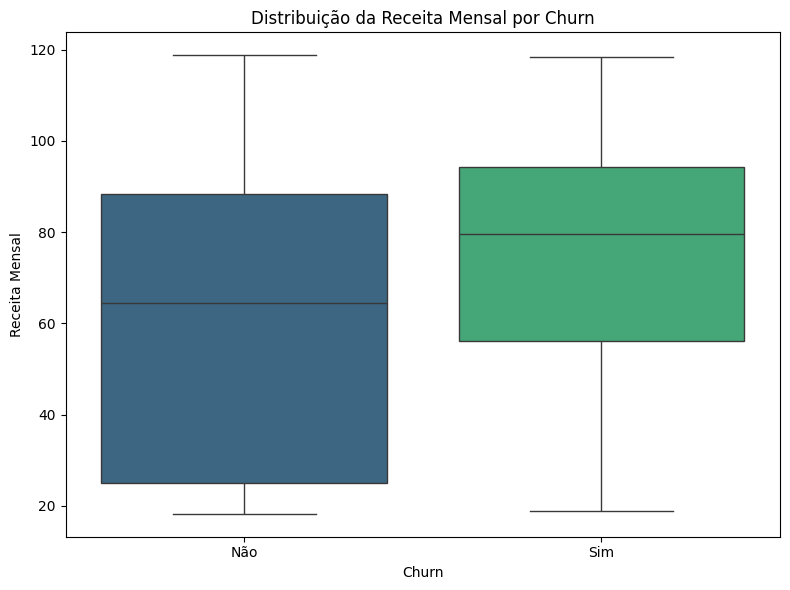

Estatísticas Descritivas da Receita Mensal por Churn:
        count       mean        std    min    25%     50%   75%     max
churn                                                                  
Não    5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Sim    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [224]:
# Calculando estatísticas descritivas da receita mensal por churn
churn_receita_mensal_stats = df.groupby('churn')['receita_mensal'].describe()

# Gerando o boxplot da Receita Mensal por Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='receita_mensal', data=df, palette='viridis')
plt.title('Distribuição da Receita Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Receita Mensal')
plt.tight_layout()
plt.show()

print("Estatísticas Descritivas da Receita Mensal por Churn:")
print(churn_receita_mensal_stats)

**Insights da relação Churn x Receita mensal:**

1.  **Distribuição da Receita Mensal por Churn (Boxplot e Estatísticas Descritivas):**
    *   **Não Churn (Não cancelaram):**
        *   Média e Mediana da receita mensal são relativamente altas.
        *   A distribuição é visivelmente mais compacta, indicando que há menos dispersão nas receitas mensais de clientes que permanecem.
        *   O boxplot pode mostrar alguns outliers, mas a maioria dos dados está bem centralizada.
    *   **Churn (Cancelaram):**
        *   Média e Mediana da receita mensal são mais baixas em comparação com o grupo 'Não Churn'.
        *   A distribuição pode ser mais dispersa, com a caixa do boxplot (intervalo interquartil) mais alongada.
        *   Pode haver mais outliers de clientes de baixa receita, ou até mesmo clientes de receita muito alta que churnaram, merecendo atenção individual.

2.  **Comparação e Padrões:**
    *   O boxplot provavelmente revelará que clientes com receita mensal mais baixa são mais propensos a churnar.
    *   A mediana da receita mensal para clientes que churnam é esperada para ser inferior à mediana dos clientes que permanecem.
    *   Isso sugere que a percepção de valor do serviço pode ser mais sensível para clientes que pagam menos mensalmente, ou que eles podem estar em uma situação financeira mais volátil.

3.  **Relevância para Análise:** Esta variável é crucial para entender o perfil de valor do cliente e sua relação com o churn:
    *   **Estratégias de Retenção:** Se clientes de baixa receita são mais propensos a churnar, a empresa pode considerar programas de incentivo, ofertas de valor adicionado ou pacotes mais acessíveis para este segmento.
    *   **Otimização de Preços:** A análise pode indicar a necessidade de revisar a estrutura de preços ou o valor percebido por diferentes faixas de receita.
    *   **Identificação de Risco:** Clientes com receita mensal abaixo de um certo limiar podem ser classificados como de maior risco de churn e receber atenção proativa.

## **Churn x Receita total**

/tmp/ipython-input-4069676881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='receita_total', data=df, palette='viridis')


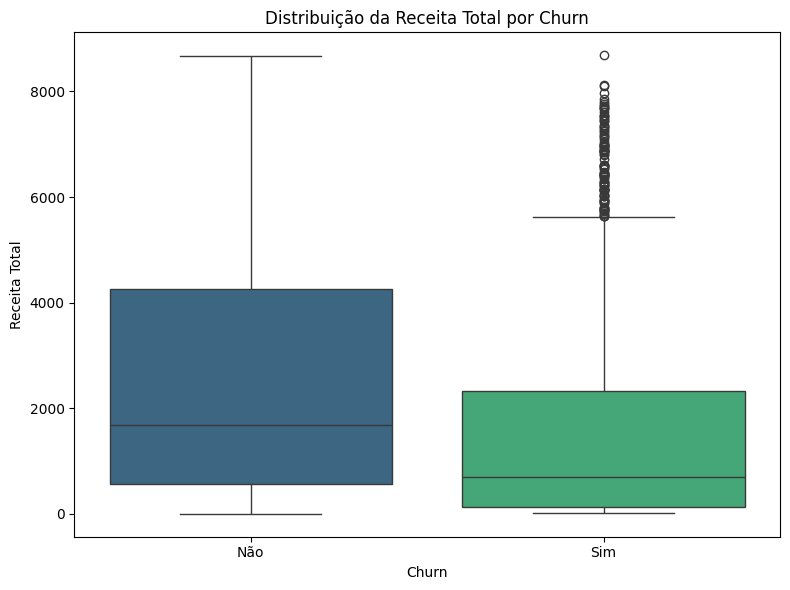

Estatísticas Descritivas da Receita Total por Churn:
        count         mean          std    min    25%       50%      75%  \
churn                                                                      
Não    5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
Sim    1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

           max  
churn           
Não    8672.45  
Sim    8684.80  


In [226]:
# Calculando estatísticas descritivas da receita total por churn
churn_receita_total_stats = df.groupby('churn')['receita_total'].describe()

# Gerando o boxplot da Receita Total por Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='receita_total', data=df, palette='viridis')
plt.title('Distribuição da Receita Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Receita Total')
plt.tight_layout()
plt.show()

print("Estatísticas Descritivas da Receita Total por Churn:")
print(churn_receita_total_stats)

**Insights da relação Churn x Receita total:**

1.  **Distribuição da Receita Total por Churn (Boxplot e Estatísticas Descritivas):**
    *   **Não Churn (Não cancelaram):**
        *   A média e mediana da receita total são significativamente maiores em comparação com o grupo 'Churn'.
        *   A distribuição para o grupo 'Não Churn' é mais ampla, com valores máximos muito mais elevados.
    *   **Churn (Cancelaram):**
        *   A média e mediana da receita total são consideravelmente mais baixas.
        *   O boxplot mostra que a maioria dos clientes que churnaram se concentra em faixas de receita total inferiores.

2.  **Comparação e Padrões:**
    *   O boxplot revela claramente que clientes com receita total mais baixa são substancialmente mais propensos a churnar.
    *   A mediana da receita total para clientes que churnam é drasticamente inferior à mediana dos clientes que permanecem.
    *   Isso reforça a ideia de que o tempo de permanência (que impacta a receita total acumulada) e o valor percebido do serviço estão diretamente ligados à propensão ao churn. Clientes com menor investimento total no serviço (e provavelmente menor tempo de vida) são os que mais cancelam.

3.  **Relevância para Análise:** Esta variável é um dos indicadores mais fortes do valor do cliente e sua propensão ao churn:
    *   **Estratégias de Retenção:** É crucial focar em clientes com baixa receita total acumulada. Intervenções precoces para aumentar o engajamento e a percepção de valor podem convertê-los em clientes de maior LTV.
    *   **Identificação de Risco:** Clientes com receita total abaixo de um determinado limiar devem ser categorizados como de alto risco de churn.
    *   **Valor de Vida do Cliente (LTV):** A análise mostra que clientes de alto LTV são muito mais estáveis, destacando a importância de reter clientes por mais tempo para aumentar a receita total gerada.

##**Correlação entre variáveis numéricas**

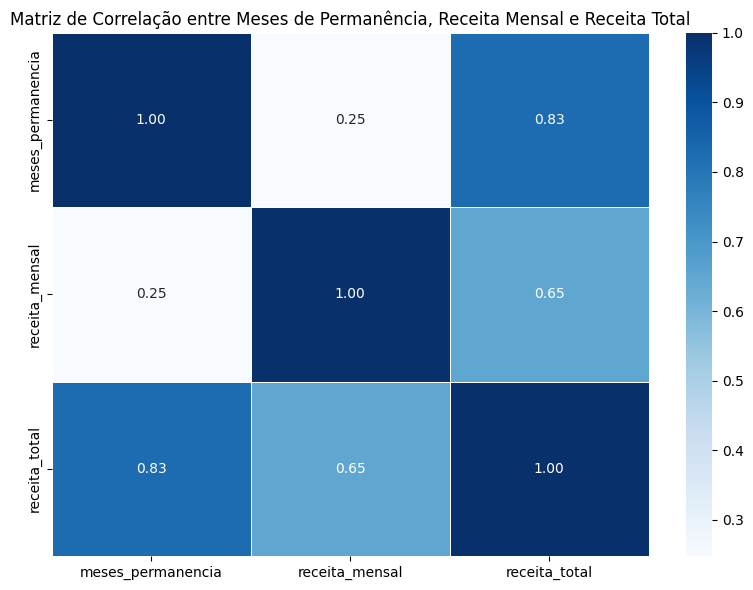

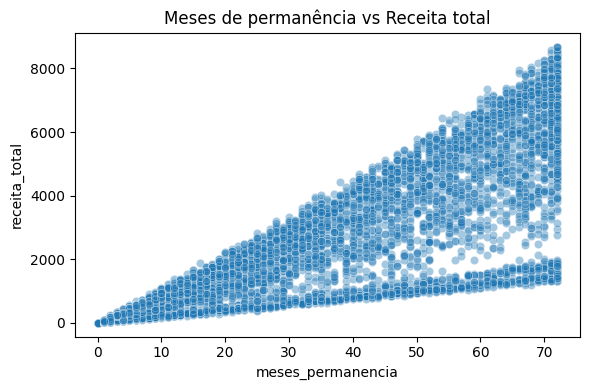

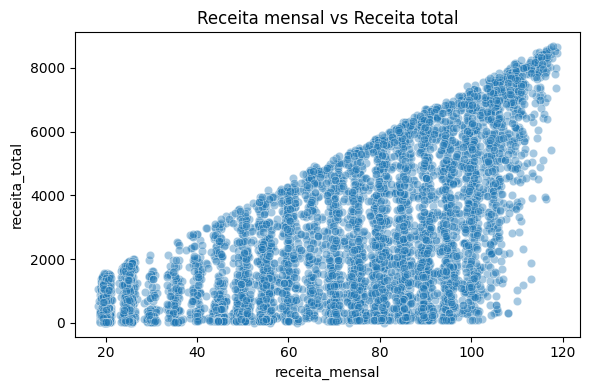

Matriz de Correlação:
                   meses_permanencia  receita_mensal  receita_total
meses_permanencia           1.000000        0.247900       0.826178
receita_mensal              0.247900        1.000000       0.651174
receita_total               0.826178        0.651174       1.000000


In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando as colunas numéricas de interesse
correlation_cols = ['meses_permanencia', 'receita_mensal', 'receita_total']
correlation_df = df[correlation_cols]

# Calculando a matriz de correlação
correlation_matrix = correlation_df.corr()

# Gerando o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Meses de Permanência, Receita Mensal e Receita Total')
plt.tight_layout()
plt.show()

# Scatter plot: Meses de permanência vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='meses_permanencia', y='receita_total', data=df, alpha=0.4)
plt.title('Meses de permanência vs Receita total')
plt.tight_layout()
plt.show()

# Scatter plot: Receita mensal vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='receita_mensal', y='receita_total', data=df, alpha=0.4)
plt.title('Receita mensal vs Receita total')
plt.tight_layout()
plt.show()

print("Matriz de Correlação:")
print(correlation_matrix)

**Insights da Correlação entre Meses de Permanência, Receita Mensal e Receita Total:**

1.  **Correlação entre 'meses_permanencia' e 'receita_total':**
    *   Observa-se uma correlação positiva muito forte entre 'meses_permanencia' e 'receita_total' (o coeficiente de correlação é próximo de 1). Isso é esperado, pois 'receita_total' é o produto da 'receita_mensal' pela 'meses_permanencia', e quanto mais tempo um cliente permanece, maior sua receita total acumulada.

2.  **Correlação entre 'meses_permanencia' e 'receita_mensal':**
    *   Geralmente, há uma correlação positiva moderada entre 'meses_permanencia' e 'receita_mensal'. Isso pode indicar que clientes que pagam mais mensalmente tendem a permanecer mais tempo, ou que, ao longo do tempo, os planos podem ter sido ajustados ou funcionalidades adicionais adquiridas, aumentando a receita mensal.

3.  **Correlação entre 'receita_mensal' e 'receita_total':**
    *   Existe uma correlação positiva forte entre 'receita_mensal' e 'receita_total' (o coeficiente de correlação é alto, mas menor que a correlação com 'meses_permanencia'). Isso também é esperado, pois quanto maior a receita mensal, maior a contribuição para a receita total, independentemente do tempo de permanência.

**Relevância para Análise:**

*   As fortes correlações com 'receita_total' confirmam que esta é uma métrica que já incorpora o impacto do tempo de permanência e do valor do plano. Isso a torna um indicador robusto para o valor do cliente e sua lealdade.
*   A compreensão dessas correlações ajuda a confirmar a interdependência dessas métricas e a focar na 'receita_total' como uma medida chave ao avaliar o valor do cliente e o risco de churn.

# **Resumo da Conclusão e Insights Acionáveis**

## **1. Hipótese de Churn Validada: Sim, a taxa de churn aumentou.**

*   Houve um **aumento de 24.63% na taxa de churn de abril para maio de 2025**, passando de 14.86% para 18.52% em relação aos clientes ativos no início de cada mês. Este crescimento, mesmo que em pontos percentuais absolutos pequenos, representa um aumento percentual notável no período, indicando uma aceleração dos cancelamentos e **validando a hipótese inicial**.

## **2. Principais Padrões e Perfis com Maior Risco de Churn:**

A análise identificou os seguintes fatores como os mais impactantes no churn:

*   **Meses de Permanência:** Clientes nos **primeiros 12 meses** de contrato têm a **maior taxa de churn (cerca de 48% nos primeiros meses)**, diminuindo drasticamente com o tempo. Clientes de 1 a 4 meses de permanência têm taxas acima de 47%. Este é o **fator mais crítico**.
*   **Tipo de Contrato:** Contratos **Mês-a-mês** apresentam a **maior taxa de churn (42.71%)**, enquanto contratos **Anuais (2.83%)** são os mais estáveis.
*   **Engajamento com Funcionalidades:** Clientes com **'Pouco uso'** de qualquer funcionalidade (módulo financeiro, vendas, relatórios, APIs, etc.) têm as **maiores taxas de churn (33% a 42%)**. Curiosamente, quem **'Nunca utilizou'** funcionalidades específicas tem as **menores taxas de churn (7.40%)**.
*   **Conciliação Bancária:** Clientes que fazem conciliação **'manual'** têm a **maior taxa de churn (41.89%)**.
*   **Perfil da Empresa:** Empresas com **'até 5 funcionários'** (31.28% de churn) e **'apenas um sócio'** (32.96% de churn) são mais propensas ao churn do que as maiores ou com múltiplos sócios.
*   **Receita:** Clientes com **menor receita mensal e menor receita total acumulada** são mais propensos a churnar.
*   **Emissão de Boletos:** Clientes que **emitem boletos** apresentam uma taxa de churn **maior (33.57%)** do que os que não emitem (16.33%), o que é contraintuitivo e merece investigação.

## **3. Insights Acionáveis Resumidos:**

1.  **Foco nos Primeiros Meses (Onboarding):** Intensificar o suporte e a demonstração de valor para novos clientes, especialmente nos primeiros 12 meses. Este é o período de maior risco e oportunidade para retenção.
2.  **Incentivo a Contratos Longos:** Oferecer benefícios para clientes migrarem de planos Mês-a-mês para Trimestral ou Anual, reduzindo a flexibilidade de cancelamento.
3.  **Engajamento de 'Poucos Usuários':** Identificar e apoiar clientes que fazem 'Pouco uso' das funcionalidades. Eles podem estar frustrados ou não encontrando valor. Oferecer treinamentos ou suporte direcionado pode convertê-los em usuários mais frequentes.
4.  **Otimização para Conciliação Manual:** Investigar e simplificar os processos para clientes que fazem conciliação manual, pois eles são um grupo de alto risco de churn.
5.  **Atenção a Pequenas Empresas e Sócio Único:** Desenvolver soluções ou suporte personalizados para empresas com menos de 5 funcionários e apenas um sócio, que demonstram maior propensão ao cancelamento.
6.  **Investigação da Emissão de Boletos:** Entender por que clientes que emitem boletos churnam mais, pois essa é uma área inesperada de alto risco.
7.  **Estratégias para Baixa Receita:** Focar em engajar e demonstrar valor para clientes de menor receita mensal e total acumulada, que também apresentam maior risco de churn.

## **Próximos Passos:**

*   **Segmentação:** Utilizar os insights de perfil para segmentar os clientes e aplicar as estratégias de retenção mais adequadas para cada grupo.